# Review Pandas
. df summary <br>
. pandas join by pd.merge() and pd.concat() <br>
. df import/export <br>

In [6]:
import seaborn as sns
import webbrowser
import pandas as pd
import sklearn

In [2]:
df = sns.load_dataset("titanic")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [4]:
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
type(df.groupby("pclass").fare.mean()) #pd.Series()

pandas.core.series.Series

In [9]:
#get mean fare by class
class_fare = df.groupby("pclass").fare.mean().reset_index()
print(type(class_fare))

class_fare



<class 'pandas.core.frame.DataFrame'>


,pclass,fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [10]:
df.alive.value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [12]:
#get mean fare by class, and .sort_values()
class_alive = df.groupby("pclass").alive.value_counts().reset_index().sort_values(['pclass', "alive"])
class_alive

,pclass,alive,count
1,1,no,80
0,1,yes,136
2,2,no,97
3,2,yes,87
4,3,no,372
5,3,yes,119


In [13]:
class_alive.shape

(6, 3)

In [14]:
class_fare.shape

(3, 2)

In [15]:
# join class_fare and class_alive by pclass by pd.merge()
pd.merge(class_fare, class_alive, on ="pclass").sort_values(["alive"], ascending = False)

,pclass,fare,alive,count
1,1,84.154687,yes,136
3,2,20.662183,yes,87
5,3,13.675550,yes,119
0,1,84.154687,no,80
2,2,20.662183,no,97
4,3,13.675550,no,372


In [16]:
#pratice pd.concat()
class_fare_dup = pd.concat([class_fare, class_fare], axis = 0) #duplicate class_fare by row
class_fare_dup

,pclass,fare
0,1,84.154687
1,2,20.662183
2,3,13.675550
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [17]:
class_fare_dup.reset_index(drop = True, inplace= True)
class_fare_dup

,pclass,fare
0,1,84.154687
1,2,20.662183
2,3,13.675550
3,1,84.154687
4,2,20.662183
5,3,13.675550


In [18]:
pd.concat([class_fare_dup, class_alive], axis = 1)

,pclass,fare,pclass,alive,count
0,1,84.154687,1,yes,136
1,2,20.662183,1,no,80
2,3,13.675550,2,no,97
3,1,84.154687,2,yes,87
4,2,20.662183,3,no,372
5,3,13.675550,3,yes,119


# how to deal with Python pacakge issue

In [1]:
import pandas as pd
pd.__version__

'2.1.0'

In [3]:
# how to upgrade package
!pip install -U pandas #-U for upgrade package

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ydk152\\AppData\\Local\\anaconda3\\Lib\\site-packages\\~andas.libs\\msvcp140-59fdf63e48138046aebeb6ddb5b4e960.dll'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/2d/5e/9213ea10ac473e2437dc2cb17323ddc0999997e2713d6a0b683b10773994/pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 14.5 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/10.6 MB 34.9 MB/s eta 0:00:01
   ----------------- ---------------------- 4.6/10.6 MB 49.2 MB/s eta 0:00:01
   --------------------------- ------------ 7.4/10.6 MB 52.5 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 72.6 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 72.6 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.0
    Uninstalling pandas-2.1.0:
      Successfully uninstalled pandas-2.1.0


In [2]:
!pip install pandas==2.1.0

  Obtaining dependency information for pandas==2.1.0 from https://files.pythonhosted.org/packages/b7/f8/32d6b5aa4c4bc045fa2c4c58f88c325facc54721956c6313f0afea8ea853/pandas-2.1.0-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.1.0-cp311-cp311-win_amd64.whl.metadata (18 kB)
Using cached pandas-2.1.0-cp311-cp311-win_amd64.whl (11.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ydk152\\AppData\\Local\\anaconda3\\Lib\\site-packages\\~-ndas.libs\\msvcp140-59fdf63e48138046aebeb6ddb5b4e960.dll'
Consider using the `--user` option or check the permissions.





# Lecture 04 Data Visualization with Matplotlib
  

### Purpose: Learn how to use the Matplotlib library to plot beautiful graphs.



In [1]:
import numpy as np
import pandas as pd

In [37]:
#pip install matplotlib

In [2]:
import matplotlib #MatLab
print('My matplotlib version is {}'. format(matplotlib. __version__))

My matplotlib version is 3.7.1


In [3]:
pip install matplotlib==3.5.3

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.2/7.2 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\bcqgu\\AppData\\Roaming\\Python\\Python39\\site-packages\\~atplotlib.libs\\msvcp140-7a5216ee7dbbe0be4badcb1661870433.dll'
Check the permissions.



In [3]:
import webbrowser

# generate an URL
url = 'https://pypi.org/project/matplotlib/'
webbrowser.open(url)

True

In [1]:
#pip install docstring

<iframe src='https://pypi.org/project/matplotlib/' width="100%" height="500px">
</iframe>

In [4]:
#import matplotlab as plt (alias) and configure to show output in a cell
import matplotlib.pyplot as plt #thru pyplot API func
%matplotlib inline 

[]

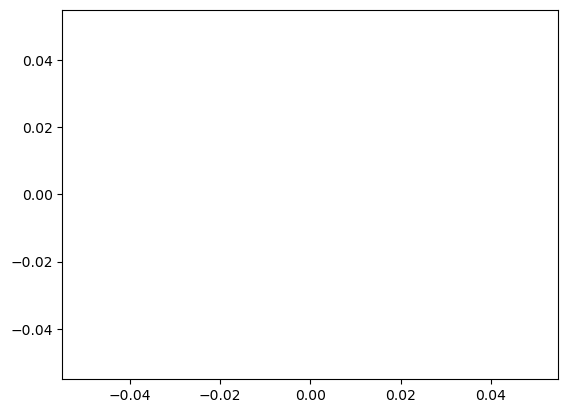

In [5]:
plt.plot()

When running python using the command line, the graphs are typically shown in a separate window.   
In a Jupyter notebook, we can simply output the graphs within the notebook itself by running the *`%matplotlib inline`* magic command.


# Now let's plot our first graph! 

[]

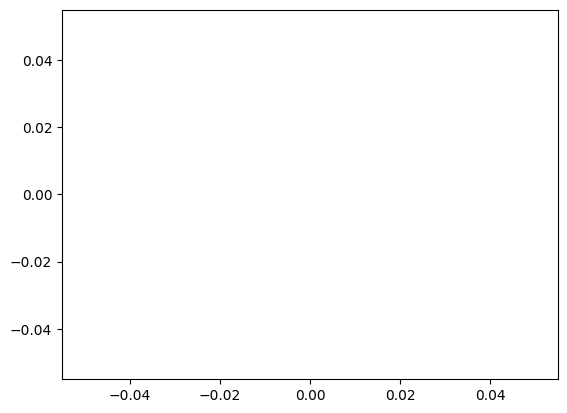

In [3]:
plt.plot()

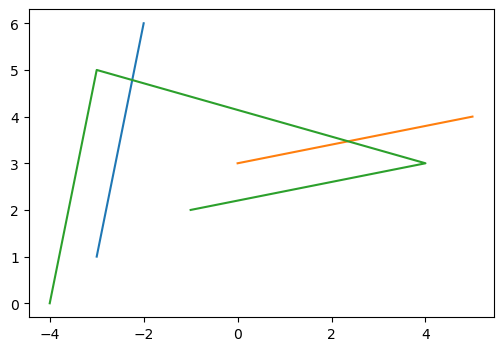

In [15]:
#create a plot date
x=[-3, -2, 5, 0]
y=[1, 6, 4, 3]

plt.figure(figsize = (6,4))
plt.plot(x[:2], y[:2]) #default line type
plt.plot(x[2:], y[2:])
plt.plot([i-1 for i in x], [j -1 for j in y])
plt.show()

* ★Yep, it's as simple as calling the **`plot`** function with some data, and then calling the **`show`** function!

* If the **`plot`** function is given one array of data, it will use it as the coordinates on the vertical axis, and it will just use each data point's index in the array as the horizontal coordinate.  
* You can also provide two arrays: one for the horizontal axis **`x`**, and the second for the vertical axis **`y`**.

What does **`plt.plot`** really stand for?

**`matplotlib.pyplot.plot()`**  # "plt" for matplotlib.pyplot

The axes automatically match the extent of the data.  We would like to give the graph a bit more room, so let's call the `axis` function to change the extent of each axis **`[xmin, xmax, ymin, ymax]`**.

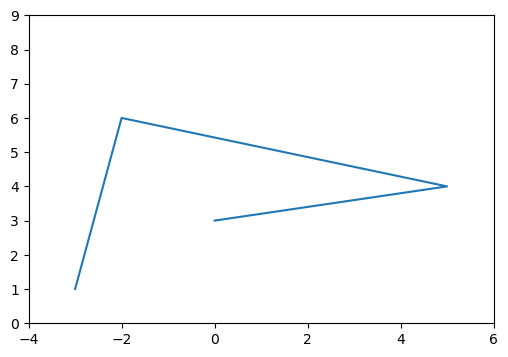

In [16]:
plt.figure(figsize = (6,4)) #define out plot size
plt.plot(x, y)
plt.axis([-4, 6, 0, 9]) #xmin = -4 , xmax - 6,  etc
plt.show()

Now, let's plot a mathematical function. We use NumPy's **`linspace`** function to create an array **`x`** containing 500 floats ranging from -2 to 2, then we create a second array **`y`** computed as the square of **`x`**.

In [17]:
import numpy as np
x = np.linspace(-2, 2, 500) #create 500 intervals between -2 and 2 inclusive  
y = x**2

In [21]:
x[-5:]

array([1.96793587, 1.9759519 , 1.98396794, 1.99198397, 2.        ])

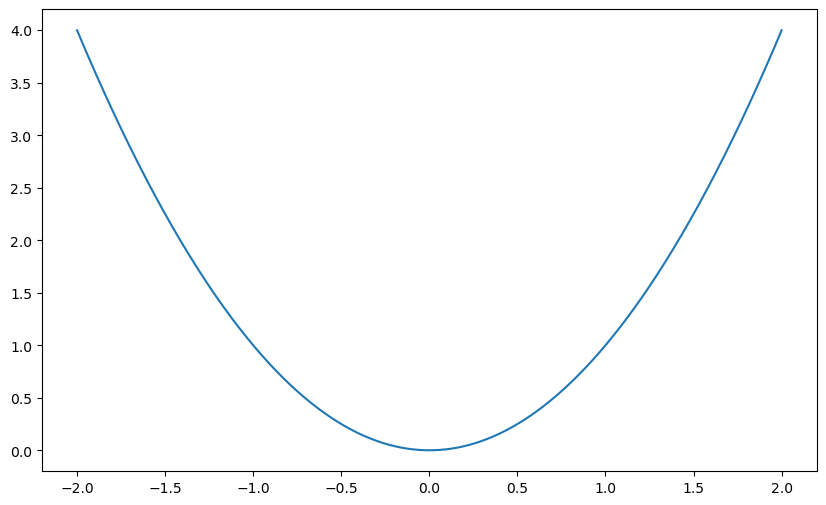

In [22]:
plt.figure(figsize =(10,6))
plt.plot(x, y)
plt.savefig("./sample_img_2.png") #savefig should run before .show(), or it will return a blank
plt.show()

# use system func to check the file

In [24]:
import os #bytes
os.path.exists("sample_img_2.png") #return T/F
#os.path.getsize("img_2.png")

True

In [25]:
os.path.getsize("sample_img_2.png")

29579

# Let's add a title, and x, y labels, then draw a grid.

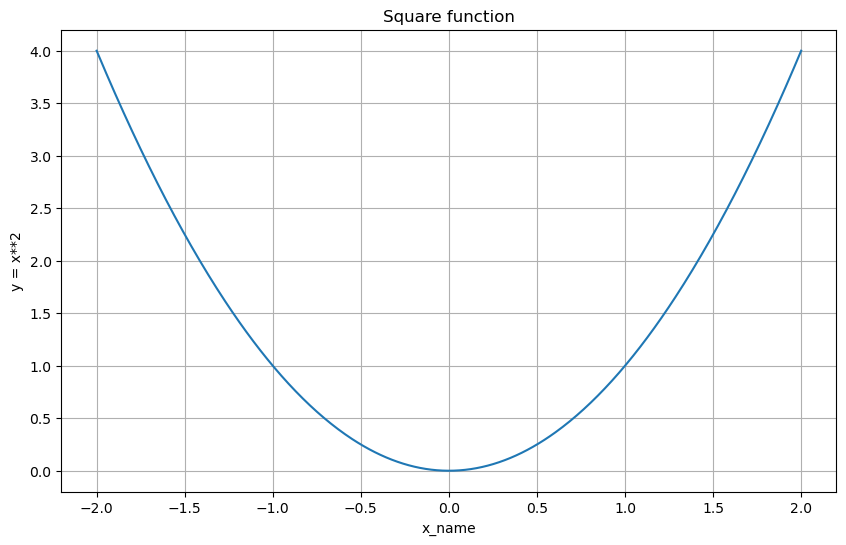

In [26]:
plt.figure(figsize =(10,6))
plt.plot(x, y)
plt.title("Square function")  #\n subtitle
plt.xlabel("x_name") #,fontsize = 30
plt.ylabel("y = x**2")
plt.grid()
plt.show()

## ★ Line style and color

By default, matplotlib draws a line between consecutive points.

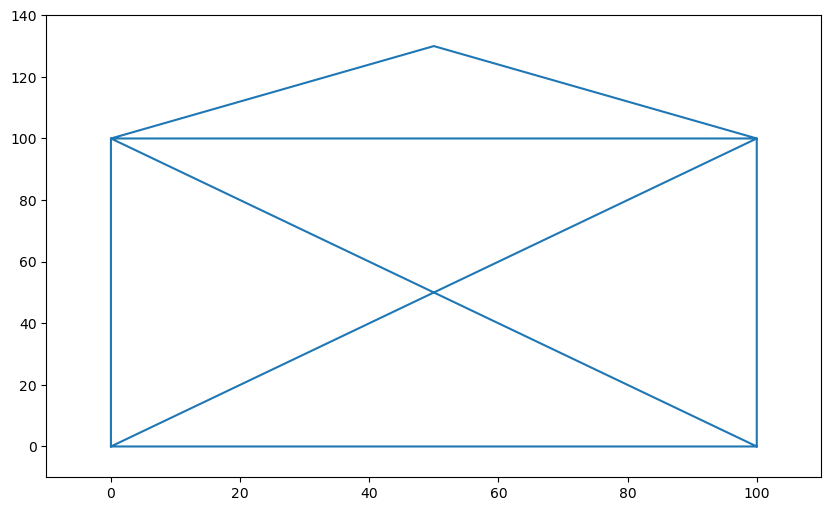

In [27]:
plt.figure(figsize = (10,6))
x = [0, 100, 100, 0, 0, 100, 50, 0, 100]
y = [0, 0, 100, 100, 0, 100, 130, 100, 0]
plt.plot(x, y)
plt.axis([-10, 110, -10, 140]) #set plot boundary
plt.show()

You can pass a 3rd argument in `plt.plot()` to change the line's style and color.
For example `"g--"` means "green dashed line".

You can plot multiple lines in one graph as : just pass `x1, y1, [style1], x2, y2, [style2], ...`

For example:

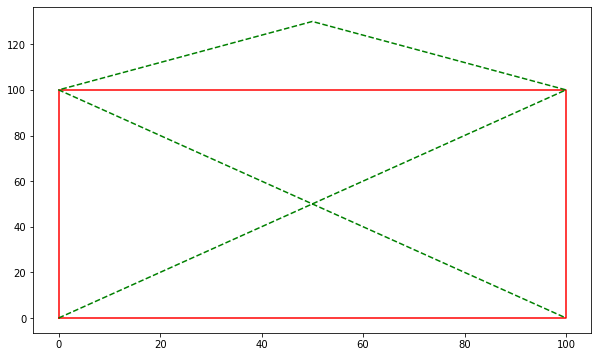

In [55]:
plt.figure(figsize = (10,6))
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-") #plot these dots in red solid line
plt.plot([0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "g--") #in green dash line
plt.show()

★ Or simply call `plot` multiple times before calling `show`.

You can also draw simple points instead of lines. Here's an example with green dashes, red dotted line and blue triangles.
Check out [the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) for the full list of ★style & color options.

In [29]:
plt.figure(figsize = (10,6))
x = np.linspace(-1.4, 1.4, 30) #from -1.4 (included) to 1.4 (included) with 30 splits
len(x)

30

<Figure size 1000x600 with 0 Axes>

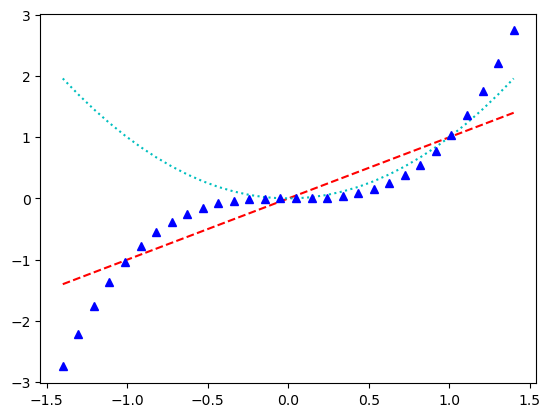

In [30]:
plt.plot(x, x, 'r--') #1 curve plot 
#plt.show()
plt.plot(x, x**2, 'c:')
plt.plot(x, x**3, 'b^')# 2 cuvers plots
plt.show()

The plot function returns a list of `Line2D` objects (one for each line).  You can set extra attributes on these lines, such as the line width, the dash style or the alpha level.  See the full list of attributes in [the documentation](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties).

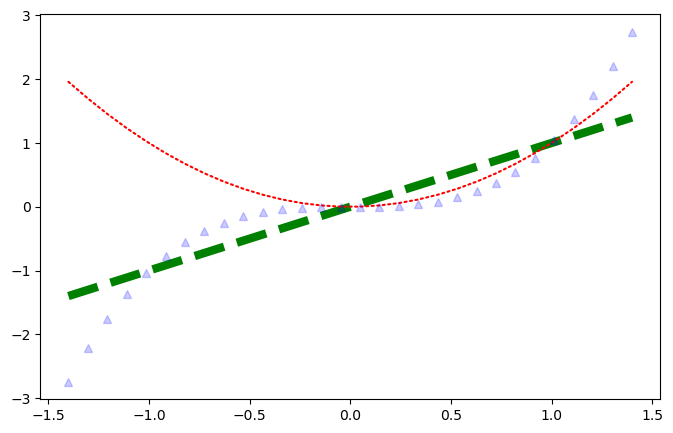

In [32]:
plt.figure(figsize = (8,5))
x = np.linspace(-1.4, 1.4, 30)
line1, line2, line3 = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
line1.set_linewidth(6.0) #width of green line
line2.set_dash_capstyle("round") #green dash with round edge
line3.set_alpha(0.2) #low alph will make line transparent, blending of color, with value between 0 and 1
plt.show()

## Subplots
A matplotlib figure may contain multiple subplots. These subplots are organized in a grid. To create a subplot, just call the `subplot` function, and specify the number of rows and columns in the figure, and the index of the subplot you want to draw on (starting from 1, then left to right, and top to bottom). Note that pyplot keeps track of the currently active subplot, so when you call the `plot` function, it draws on the *active* subplot.


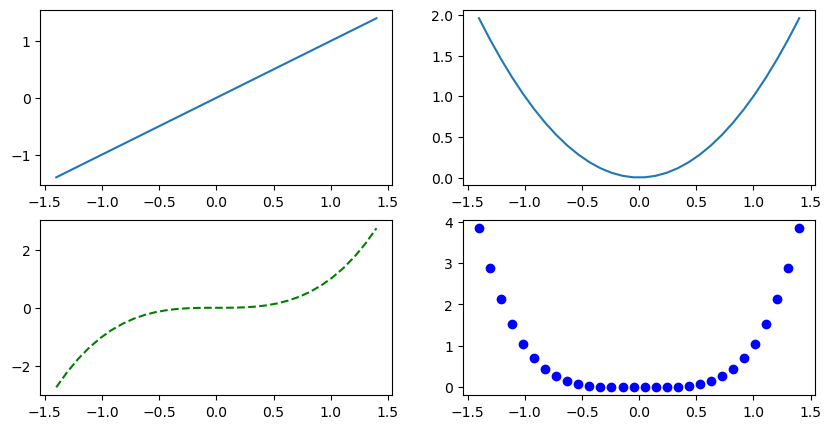

In [35]:
#★
plt.figure(figsize = (10, 5))
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(221)  # 2 rows, 2 columns, 1st subplot => top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot => top right
plt.plot(x, x**2)
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot => bottow left
plt.plot(x, x**3, 'g--')
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot => bottom right
plt.plot(x, x**4, 'bo')
plt.show()

* ★Note that `subplot(223)` is a shorthand for `subplot(2, 2, 3)` without comma.

It is easy to create subplots that span across multiple grid cells like so:

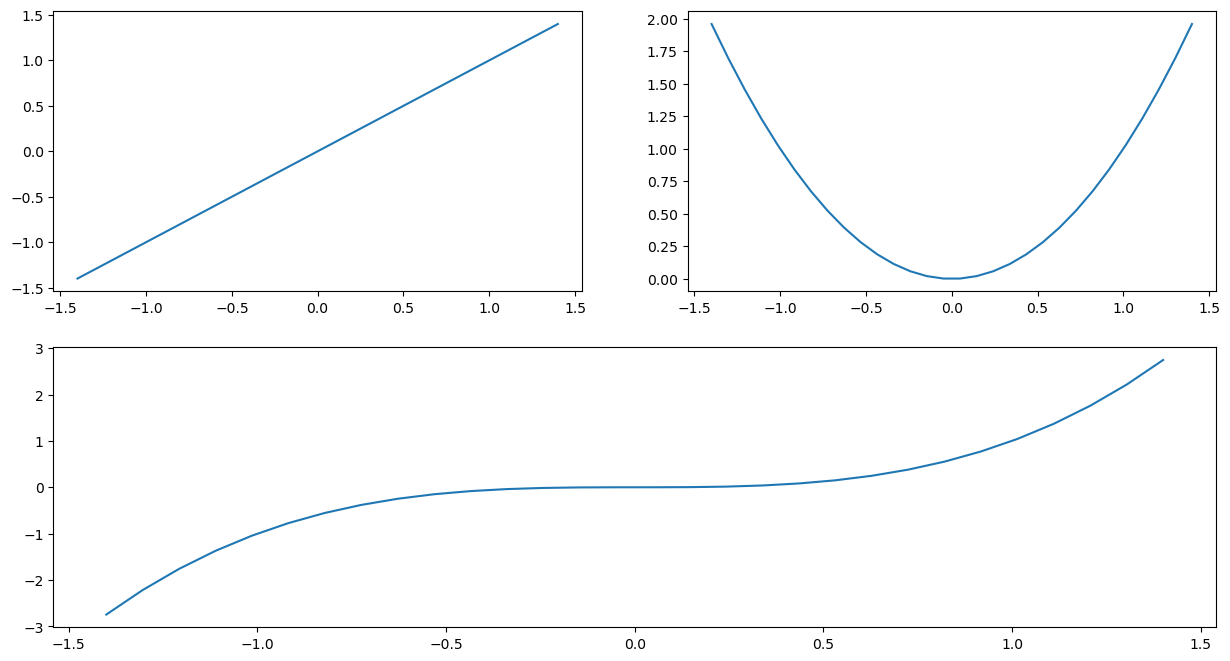

In [37]:
plt.figure(figsize = (15,8))
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 1, 2) # 2 rows, *1* column, 2nd subplot = bottom, which stretch out to make up space
plt.plot(x, x**3)
plt.show()

If you need more complex subplot positionning, you can use `subplot2grid` instead of `subplot` to position the subplots in figure. First, yYou specify the number of rows and columns in the grid, then your subplot's position in that grid (top-left = (0,0)), and optionally how many rows and/or columns it spans.  For example:

plt.subplot2grid(shape, loc, rowspan=1, colspan=1, fig=None, **kwargs)

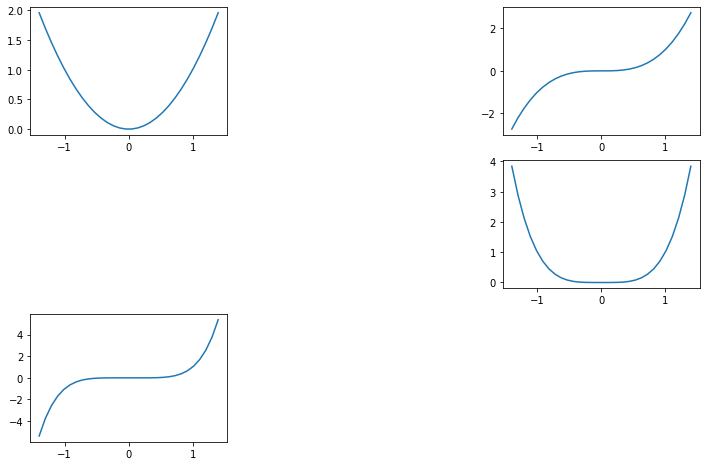

In [40]:
plt.figure(figsize = (12,8))
plt.subplot2grid((3,3), (0, 0)) #top-left in a 3 by 3 grid
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0, 2)) ##top-right
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1, 2)) #bottom-right 
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0)) #bottom-left
plt.plot(x, x**5)
plt.show()

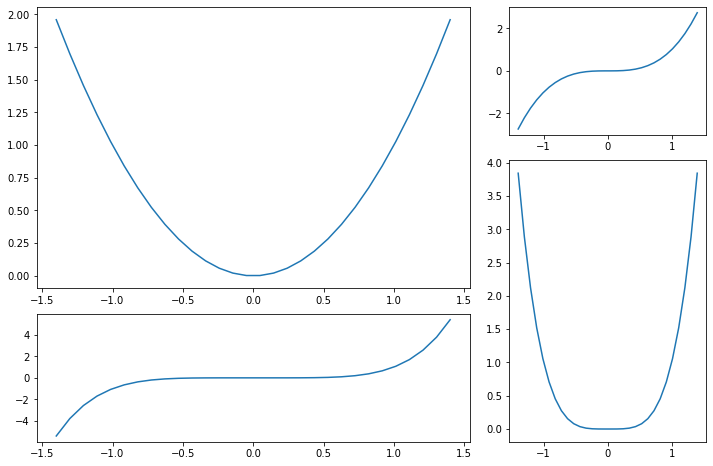

In [41]:
plt.figure(figsize = (12,8))
plt.subplot2grid((3,3), (0, 0), rowspan=2, colspan=2) #top-left
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0, 2)) ##top-right
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1, 2), rowspan=2) #bottom-right 
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0), colspan=2) #bottom-left
plt.plot(x, x**5)
plt.show()

If you need even more flexibility in subplot positioning, check out the [GridSpec documentation](http://matplotlib.org/users/gridspec.html)

## Include Text in the plot
You can call **`.text()`** to add text at any location in the graph. Just specify the horizontal and vertical coordinates and the text, and optionally some extra attributes.

In [82]:
x = np.linspace(-1.5, 1.5, 30).round(4) #presion of 4 digit after decimal
x

array([-1.5   , -1.3966, -1.2931, -1.1897, -1.0862, -0.9828, -0.8793,
       -0.7759, -0.6724, -0.569 , -0.4655, -0.3621, -0.2586, -0.1552,
       -0.0517,  0.0517,  0.1552,  0.2586,  0.3621,  0.4655,  0.569 ,
        0.6724,  0.7759,  0.8793,  0.9828,  1.0862,  1.1897,  1.2931,
        1.3966,  1.5   ])

In [40]:
print("Square function\n$y = x^2$") #\n for newline

Square function
$y = x^2$


In [42]:
# horizontalalignment or ha : [ 'center' | 'right' | 'left' ]
# verticalalignment or va: [ 'center' | 'top' | 'bottom' | 'baseline' ]

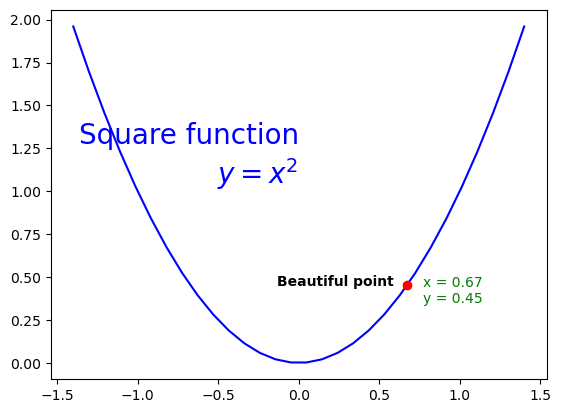

In [51]:
px = 0.6724
py = px**2
plt.plot(x, x**2, "b-", px, py, "ro")
#\n for a new line, $y = x^2$ is used to define a function
plt.text(0, 1., "Square function\n$y = x^2$", fontsize=20, color='blue', 
         ha="right",va ='bottom') 
#"ha" short for horizontalalignment
plt.text(px-0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px+0.1, py-0.1, "x = %0.2f\ny = %0.2f"%(px, py), color='green') 
#try to add rotation=90 to see what will happen
plt.show()

* Note: **`ha`** is an alias for `horizontalalignment`

For more text properties, visit [the documentation](http://matplotlib.org/users/text_props.html#text-properties).

It is quite frequent to annotate elements of a graph, such as the beautiful point above. The `annotate` function makes this easy: just indicate the location of the point of interest, and the position of the text, plus optionally some extra attributes for the text and the arrow.

In [17]:
#point data
px = 0.6724
py = px**2

In [18]:
px-1.3,py+0.5

(-0.6276, 0.95212176)

# matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)

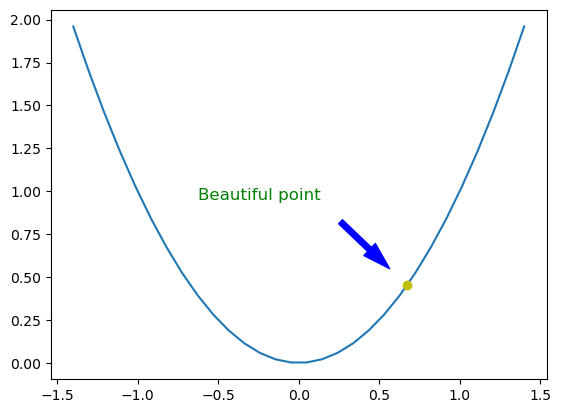

In [52]:
#annotate(text, xy, *args, **kwargs)
px = 0.6724
py = px**2
plt.plot(x, x**2, px, py, "yo")
plt.annotate("Beautiful point", color="green", fontsize=12,  xy=(px, py), 
             xytext=(px-1.3,py+0.5),
             arrowprops= {"color": "blue", "shrink":0.2, "headlength":20}) 
             #arrowprops defined as dict, shrink the arrow on both ends by 20%, 
             #set headlength of 20
plt.show()

You can also add a bounding box around your text by using the **`bbox`** attribute, see Appendix for details.

## ★ Legends
The simplest way to add a legend is to set a **`label`** on all lines, then just call the **`legend`** function.

Refer to: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

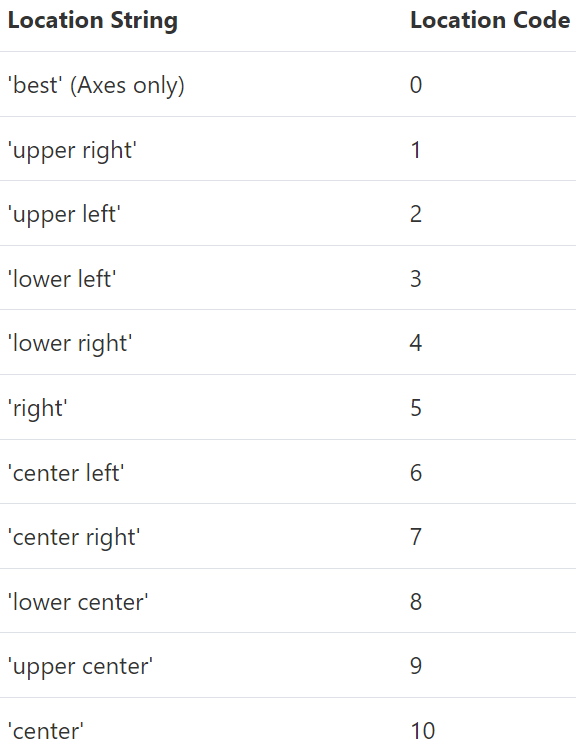

In [21]:
legend_in = pd.read_clipboard(sep = "\\n", header = None)
legend_in.shape

(24, 1)

In [22]:
legend_in.head()

,0
0,Location String
1,Location Code
2,'best' (Axes only)
3,0
4,'upper right'


In [23]:
{legend_in[0][0]:legend_in.iloc[2:len(legend_in):2, 0]}

{'Location String': 2     'best' (Axes only)
 4          'upper right'
 6           'upper left'
 8           'lower left'
 10         'lower right'
 12               'right'
 14         'center left'
 16        'center right'
 18        'lower center'
 20        'upper center'
 22              'center'
 Name: 0, dtype: object}

In [24]:
legend_2col = pd.concat(
    [pd.DataFrame({legend_in[0][0]:legend_in.iloc[2:len(legend_in):2, 0]}).reset_index(drop = True), 
     pd.DataFrame({legend_in[0][1]:legend_in.iloc[3:len(legend_in):2, 0]}).reset_index(drop = True)],
     axis = 1)

legend_2col

,Location String,Location Code
0,'best' (Axes only),0
1,'upper right',1
2,'upper left',2
3,'lower left',3
4,'lower right',4
5,'right',5
6,'center left',6
7,'center right',7
8,'lower center',8
9,'upper center',9


In [82]:
plt.figure(figsize = (10, 6))
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="Square function") #assign a label for the curve shown in legend   
plt.plot(x, x**3, "g-", label="Cube function")

plt.grid(True)
plt.legend(loc = 0) #the best is 0
#plt.legend(loc = 'lower right') #the best
plt.show()

SyntaxError: positional argument follows keyword argument (2216357172.py, line 3)

##  ★Lines 
* You can draw lines simply using the **`plot`** function, as we have done so far.    
* It is often convenient to create a utility function that plots a (seemingly) infinite line across the graph, given a slope and an intercept.   
* You can also use the **`hlines`** and **`vlines`** functions that plot horizontal and vertical line segments.  

For example:

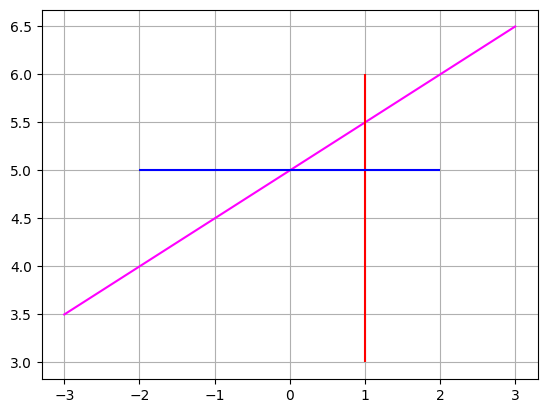

In [29]:
#defind a UDF to plot recursively
def plot_line(xmin, xmax , slope, intercept, **kargs):
#     xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# from numpy.random import randn
# x = randn(1000)
# y = 0.5*x + 5 + randn(1000)*2
# plt.scatter(x, y, alpha=0.2)

plot_line(xmin = -3, xmax = 3, slope=0.5, intercept=5, color="magenta")

#add a vertical line 
#plt.vlines(x, ymin, ymax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)
plt.vlines(1, 3, ymax = 6, color="red")  #x = 1, ymin = 3, ymax = 6
plt.hlines(5, -2, 2, color="blue")  #y = y, xmin = -2, xmax = 2
plt.grid(True)
plt.show()

## ★ Non linear scales
Matplotlib supports non linear scales, such as logarithmic or logit scales.

In [30]:
import numpy as np
x = np.linspace(0.1, 15, 500)
y_ = x**3/np.exp(2*x)
y = np.log2(y_)

In [31]:
y[:10]

array([-10.25432329,  -9.20961824,  -8.40001744,  -7.744393  ,
        -7.1974936 ,  -6.73148369,  -6.32801431,  -5.97434873,
        -5.66128398,  -5.3819536 ])

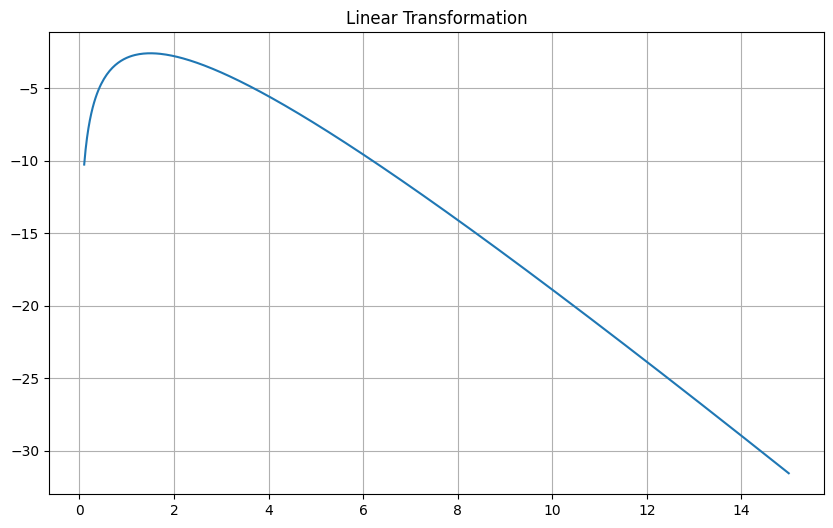

In [32]:
plt.figure(figsize = (10,6))
plt.plot(x, y)

#plt.yscale(value, **kwargs) #value: "linear", "log", "symlog", "logit", ...
plt.yscale('linear')
plt.title('Linear Transformation')
plt.grid(True)
plt.show()

## Useful types of charts

###  Scatter plot
To draw a scatter plot, simply provide the x and y coordinates of the points.
★ use **`plt.scatter()`** function.  It is useful for numeric X and y

In [ ]:
import random

### https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

. Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)

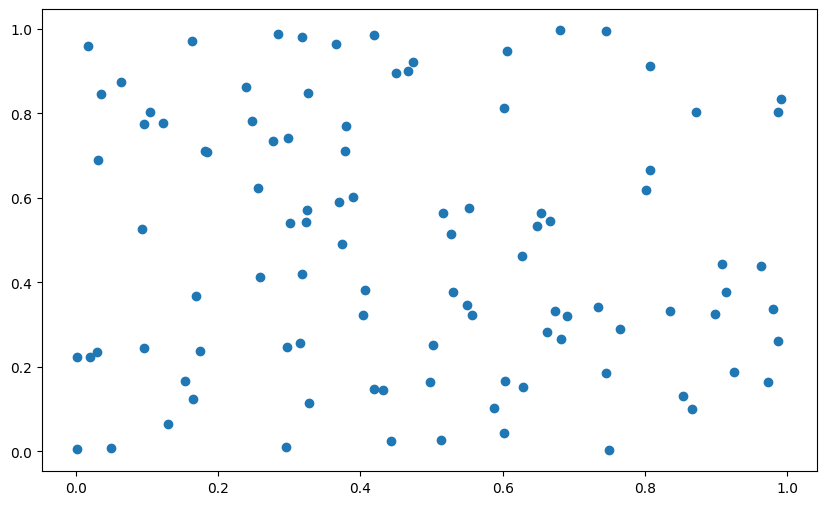

In [34]:
from numpy.random import rand
#without seed
plt.figure(figsize = (10,6))
x, y = rand(2, 100)
plt.scatter(x, y)
plt.show()

You may also optionally provide the scale of each point.

In [35]:
x, y, shape = np.random.rand(3, 100)

In [36]:
shape[:10]

array([0.46390668, 0.22187039, 0.26382043, 0.48576291, 0.24184876,
       0.86032614, 0.5138114 , 0.44856763, 0.35229942, 0.78157839])

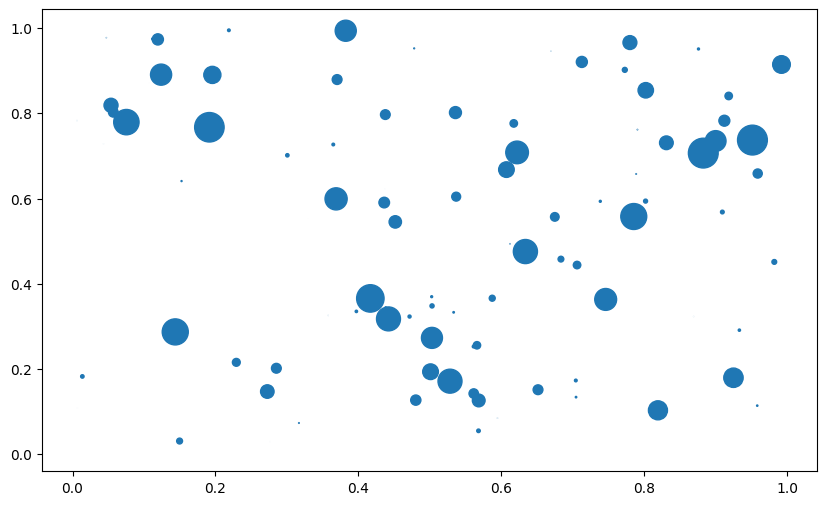

In [37]:
#scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, 
#        alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)

plt.figure(figsize = (10,6))
np.random.seed(1234)
x, y, shape = np.random.rand(3, 100) #creat 3 sets, each set has 100 element values following stand uniform distribution over [0, 1)
shape = 500 * shape ** 5
plt.scatter(x, y, s=shape) #"s" for size of points
plt.show()

And as usual there are a number of other attributes you can set, such as the **`fill`** and **`edge`** colors and the **`alpha`** level.

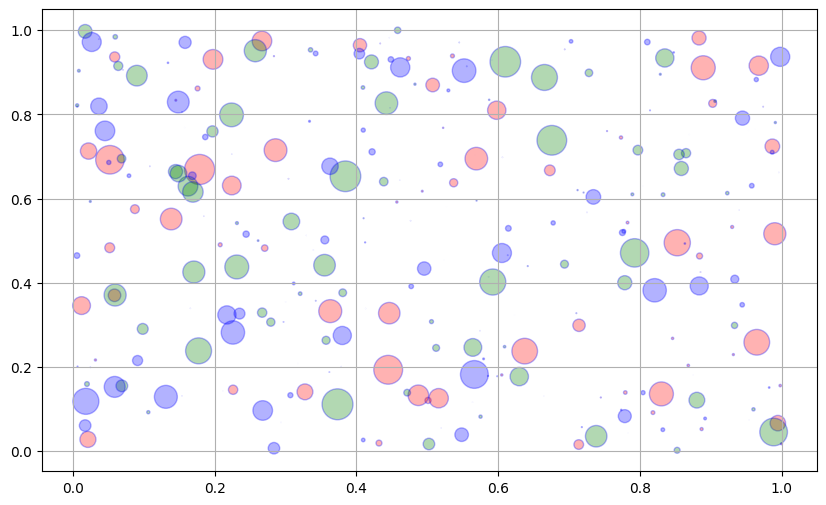

In [38]:
plt.figure(figsize = (10,6))
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = np.random.rand(2, n)
    shape = 500.0 * np.random.rand(n) ** 5
    
    plt.scatter(x, y, s=shape, c=color, alpha=0.3, edgecolors='blue') #3 plots set on top of each other
    
plt.grid(True)
plt.show()

### ★ Histograms, useful for plotting categorical variables with bins

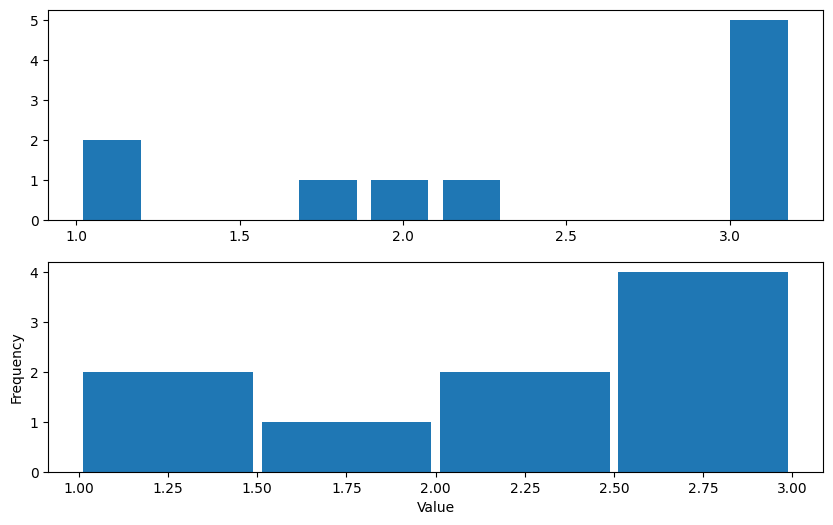

In [40]:
#plt.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, 
#        bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, 
#        log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)

data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.figure(figsize = (10,6))
plt.subplot(211)
plt.hist(data, bins = 10, rwidth = 0.8) #use bin count

#re-group data by defined bins
plt.subplot(2,1,2)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth = 0.95)m #use self-defined bins
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

# Leetcode: be prepared for job interview on coding practice 
. e.g. https://leetcode.com/problems/two-sum/
# your coding assistants: 
. Github Copilot @ https://github.com/features/copilot <br>
. Amazon codewhisper @ https://aws.amazon.com/codewhisperer/

## video @ https://aws.amazon.com/codewhisperer/resources/#Getting_started/

In [1]:
''' Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.
You may assume that each input would have exactly one solution, and you may not use the same element twice. 
You can return the answer in any order. '''

' Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.\nYou may assume that each input would have exactly one solution, and you may not use the same element twice. \nYou can return the answer in any order. '

In [1]:
#a possible solution
def twoSum(nums, target):
    for i in range(len(nums)-1):
        for j in range(i+1, len(nums)):  
            if nums[i] + nums[j] == target:                
                return [i,j]
    return [0,0]

In [ ]:
nums = [2,7,11,15], target = 9

In [5]:
twoSum([2,7,11,15], 9)

[0, 1]

# Stop here on 9/30/2023 

In [8]:
import numpy as np
import pandas as pd
import matplotlib #MatLab
print('My matplotlib version is {}'. format(matplotlib. __version__))

My matplotlib version is 3.7.1


In [11]:
import matplotlib.pyplot as plt

In [22]:
#np.random.seed(1234)
np.random.seed(1234) #freeze the random draws
data1 = np.random.randn(400)
data2 = np.random.randn(500) + 3
data3 = np.random.randn(450) + 6
data4a = np.random.randn(200) + 9
data4b = np.random.randn(100) + 10

In [24]:
data1[:10]

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

In [25]:
# implicit method .plt.hist() 

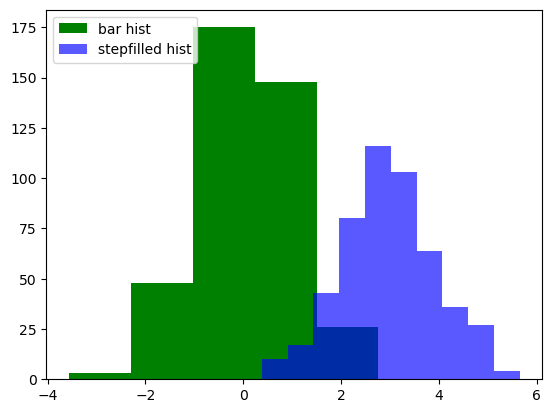

In [36]:
plt.hist(data1, bins=5, color='g', alpha = 1, label='bar hist')
plt.hist(data2, color='b', alpha=0.65, histtype='stepfilled', label='stepfilled hist')
plt.legend(loc = 2)

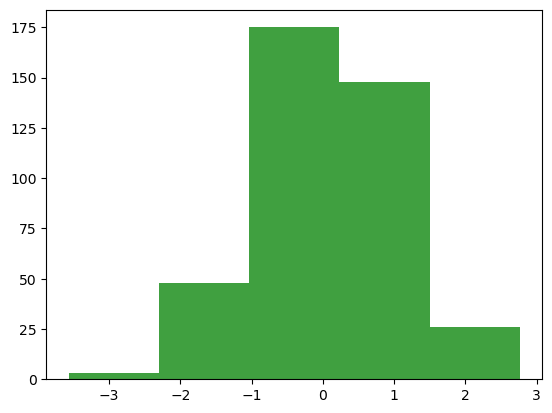

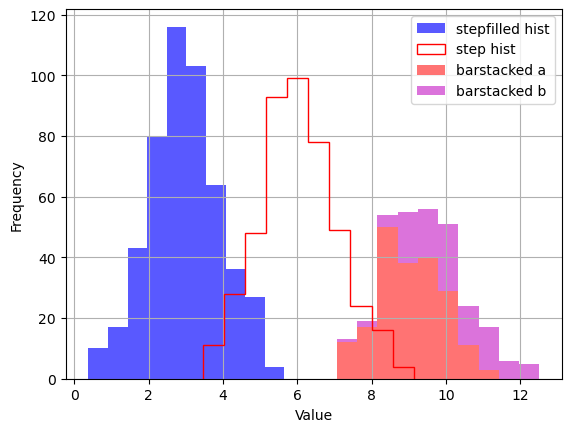

In [83]:
#plt.figure(figsize = (20, 7))
plt.hist(data1, bins=5, color='g', alpha=0.75, label='bar hist') # default histtype='bar'
plt.show()
plt.hist(data2, color='b', alpha=0.65, histtype='stepfilled', label='stepfilled hist')
plt.hist(data3, color='r', histtype='step', label='step hist')
#plt.hist((data4a, data4b), color=('r','m'), alpha=0.55, histtype='barstacked', label=('barstacked a', 'barstacked b'))

plt.hist([data4a, data4b], color=['r','m'], alpha=0.55, histtype='barstacked', label=['barstacked a', 'barstacked b'])

plt.xlabel("Value"); plt.ylabel("Frequency")
plt.legend(loc = "best"); plt.grid(True)
plt.show()

In [ ]:
# be lazy now , how to skip the .plt.

### ★ Bar plot within an arranged Box 

<BarContainer object of 4 artists>

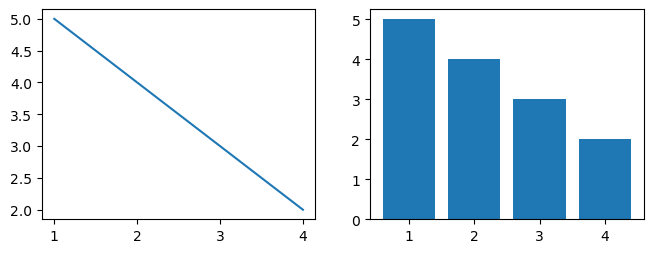

In [59]:
from matplotlib.pyplot import *
x = [1,2,3,4]; y = [5,4,3,2] # some simple data
# divide subplots into 2 x 3 grid and select #1
figure(figsize = (12,6))
subplot(2,3,1) 
plot(x, y)    #same as subplot(2, 3, 1)
subplot(232) 
bar(x, y)


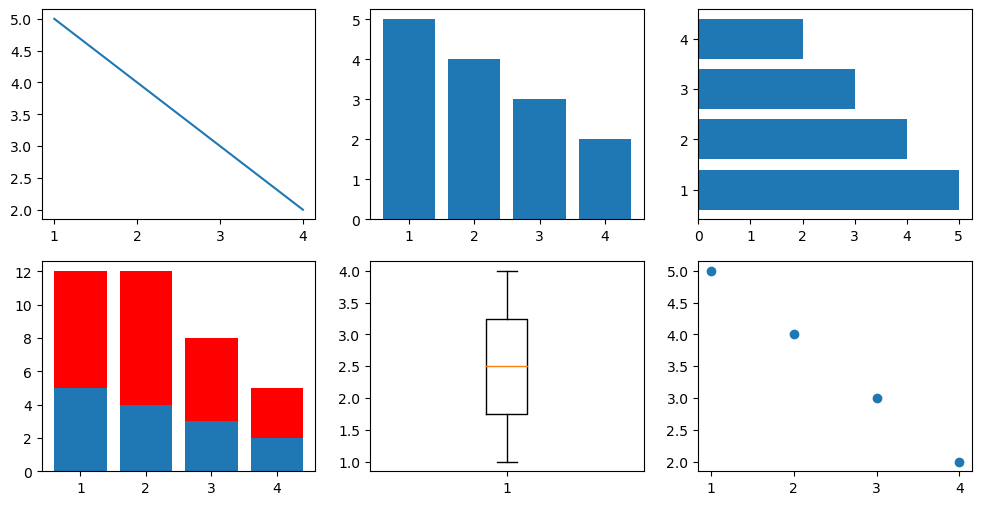

In [68]:
x = [1,2,3,4]; y = [5,4,3,2] # some simple data
# divide subplots into 2 x 3 grid and select #1
figure(figsize = (12,6))
subplot(2,3,1) 
plot(x, y)    #same as subplot(2, 3, 1)
subplot(232) 
bar(x, y)
subplot(233)
plt.barh(x, y) # horizontal bar-charts
#barh(x, y) # create stacked bar charts
y1 = [7,8,5,3]
subplot(234)
bar(x, y)
bar(x, y1, bottom=y, color = 'r') # we need more data for stacked bar charts
subplot(235)
boxplot(x) # box plot
subplot(236)
scatter(x,y)
show()

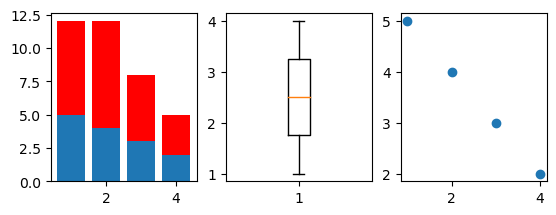

In [69]:
y1 = [7,8,5,3]
subplot(234)
bar(x, y)
bar(x, y1, bottom=y, color = 'r') # we need more data for stacked bar charts
subplot(235)
boxplot(x) # box plot
subplot(236)
scatter(x,y); 
show()
 # scatter plot

The plot function returns a list of `Line2D` objects (one for each line).  You can set extra attributes on these lines, such as the line width, the dash style or the alpha level.  See the full list of attributes in [the documentation](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties).

## Pyplot's state machine: implicit *vs* explicit
* So far we have used `pyplot` which keeps track of the currently active subplot. Every time you call the `plot()` function, pyplot just draws on the currently active subplot. 
* It also has some tricks, such as automatically creating a figure and a subplot when you call `plot()`, if they don't exist yet. This is refered to as *"implicit"*.

* When you want to draw a program, `explicit` is better than `implicit`. Explicit code is usually easier to debug and maintain, referring to the 2nd rule in the Zen of Python (https://peps.python.org/pep-0020/):

Pyplot allows you to write explicit code `subplots`, and use the figure `object` and the list of `axes` objects to further define the plot, e.g.

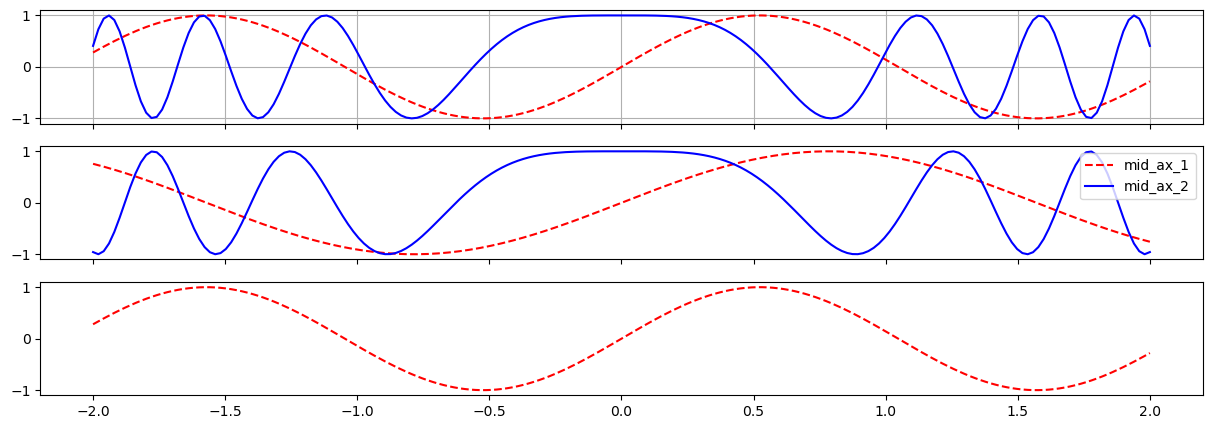

In [91]:
import numpy as np
x = np.linspace(-2, 2, 200)

# arrange 2X1 grid with 2 top plots sharing the x axis 
fig1, [ax_top, ax_mid, ax_bottom] = plt.subplots(3, 1, sharex = True)  # example of explicit

#define first item in the grid
fig1.set_size_inches(15,5)

#define the 2nd item (a set)
line1, line2 = ax_top.plot(x, np.sin(3*x), "r--", x, np.cos(5*x**2), "b-") #stack 2 plots on the top 
line1 = ax_mid.plot(x, np.sin(2*x), "r--", label = "mid_ax_1")
line2 = ax_mid.plot(x, np.cos(4*x**2), "b-", label = "mid_ax_2") #stack 2 plots on the top 
line3, = ax_bottom.plot(x, np.sin(3*x), "r--")
ax_top.grid(True)
ax_mid.legend(loc = 0)
plt.show()

# specific question/practic on dictonary and stepwise for-loop

In [93]:
dict_ = {} 

In [96]:
lst = [0,2,1,4,5]

In [103]:
lst[0+2]

1

In [109]:
lst = [0,2,1,4,5]
dict_ = {}
for i in range(0, 5, 4):
    if i + 3 > len(lst)-1:
        print(f"i = {i}, the index out of boundary")
    else:
        print(i)
        dict_[i] = lst[i+2] #assign lst[0+2] for dict_[0]
        dict_[i+1]= lst[i+3] 
        print(dict_)

0
{0: 1, 1: 4}
i = 4, the index out of boundary


In [98]:
list(range(0, 5, 4))

[0, 4]

In [105]:
# let us come back to visualization practice

## Let us play with raw input - Example 1

In [110]:
"""
Author: Aaron Penne
Created: 2018-03-13
Source: https://www.reddit.com/r/dataisbeautiful/comments/842tvn/highestpaid_ceos_in_america_oc/
"""

data_ceo_compensation = '''ceo,annual_compensation,company,annual_revenue
Thomas M. Rutledge,98000000,Charter Communications,29000000000
Leslie Moonves,68600000,CBS,13200000000
Fabrizio Freda,47700000,Estee Lauder,11800000000
Mark G. Parker,47600000,Nike,34400000000
Mark V. Hurd,41100000,Oracle,37700000000
Robert A. Iger,41000000,Walt Disney,55100000000
Safra A. Catz,40900000,Oracle,37700000000
David M. Zaslav,37200000,Discovery Communications,6500000000
Robert A. Kotick,33100000,Activision Blizzard,6600000000
Margaret C. Whitman,32900000,HP Enterprise,28900000000
'''

In [ ]:
# Get ceo data by parsing string
with open("./data_ceo_compensation.csv", 'w') as outfile:
    for line in data_ceo_compensation:
        outfile.write(line)

In [113]:
# Get ceo data by parsing string
with open("./data_ceo_compensation.csv", 'r') as infile:
    for line in infile:
        print(line)

ceo,annual_compensation,company,annual_revenue

Thomas M. Rutledge,98000000,Charter Communications,29000000000

Leslie Moonves,68600000,CBS,13200000000

Fabrizio Freda,47700000,Estee Lauder,11800000000

Mark G. Parker,47600000,Nike,34400000000

Mark V. Hurd,41100000,Oracle,37700000000

Robert A. Iger,41000000,Walt Disney,55100000000

Safra A. Catz,40900000,Oracle,37700000000

David M. Zaslav,37200000,Discovery Communications,6500000000

Robert A. Kotick,33100000,Activision Blizzard,6600000000

Margaret C. Whitman,32900000,HP Enterprise,28900000000



In [114]:
df = pd.read_csv("data_ceo_compensation.csv")
df.head()

,ceo,annual_compensation,company,annual_revenue
0,Thomas M. Rutledge,98000000,Charter Communications,29000000000
1,Leslie Moonves,68600000,CBS,13200000000
2,Fabrizio Freda,47700000,Estee Lauder,11800000000
3,Mark G. Parker,47600000,Nike,34400000000
4,Mark V. Hurd,41100000,Oracle,37700000000


In [115]:
1e9 == 1e+9

True

In [117]:
1e+9 == 1000000000

True

In [118]:
# df = df.sort_values(['annual_compensation'])
# df = df.reset_index(drop=True)

# Normalize to M and B
df['annual_compensation'] = df['annual_compensation']/1e6
df['annual_revenue'] = df['annual_revenue']/1e9

In [119]:
df

,ceo,annual_compensation,company,annual_revenue
0,Thomas M. Rutledge,98.0,Charter Communications,29.0
1,Leslie Moonves,68.6,CBS,13.2
2,Fabrizio Freda,47.7,Estee Lauder,11.8
3,Mark G. Parker,47.6,Nike,34.4
4,Mark V. Hurd,41.1,Oracle,37.7
5,Robert A. Iger,41.0,Walt Disney,55.1
6,Safra A. Catz,40.9,Oracle,37.7
7,David M. Zaslav,37.2,Discovery Communications,6.5
8,Robert A. Kotick,33.1,Activision Blizzard,6.6
9,Margaret C. Whitman,32.9,HP Enterprise,28.9


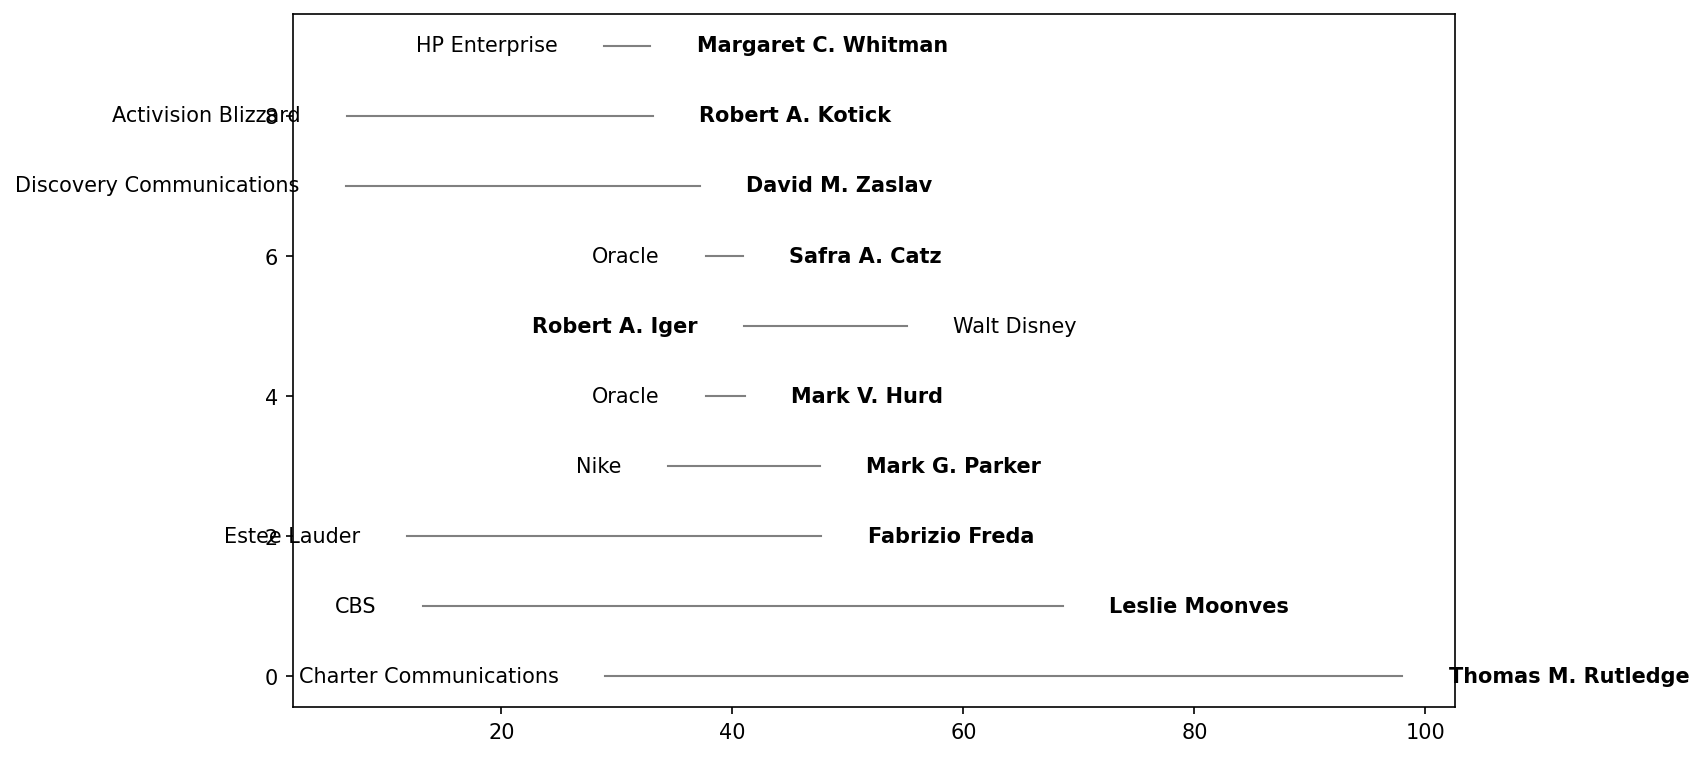

In [120]:
plt.close('all')
# Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

for i in df.index:
    x = [df.loc[i,'annual_compensation'], df.loc[i, 'annual_revenue']]
    y = [i, i]
#     print(x, y)
    plt.plot(x, y,
             color='gray',
             linestyle='-',
             linewidth=1)
    if x[0] > x[1]:
        plt.text(x[0]+4, y[0], df.loc[i, 'ceo'], horizontalalignment='left', verticalalignment='center', weight='bold')
        plt.text(x[1]-4, y[1], df.loc[i, 'company'], horizontalalignment='right', verticalalignment='center')
    else:
        plt.text(x[0]-4, y[0], df.loc[i, 'ceo'], horizontalalignment='right', verticalalignment='center', weight='bold')
        plt.text(x[1]+4, y[1], df.loc[i, 'company'], horizontalalignment='left', verticalalignment='center')

# do not plot now

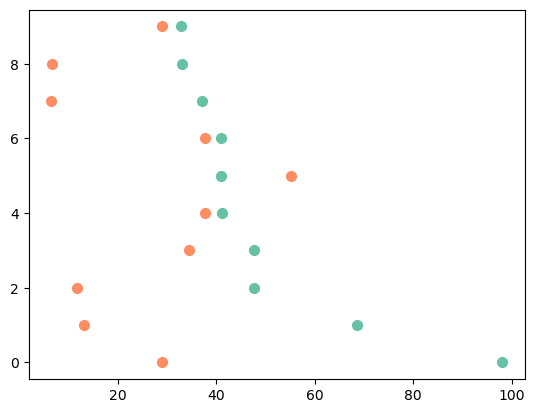

In [122]:
# Plot compensation
x = df.loc[:,'annual_compensation']
y = df.index
plt.plot(x, y,
         color='#65C2A5',
         linestyle='None',
         marker='o',
         markersize=7,
         fillstyle='full')

# Plot company revenue
x = df.loc[:,'annual_revenue']
y = df.index
plt.plot(x, y,
         color='#FC8D62',
         linestyle='None',
         marker='o',
         markersize=7,
         fillstyle='full')


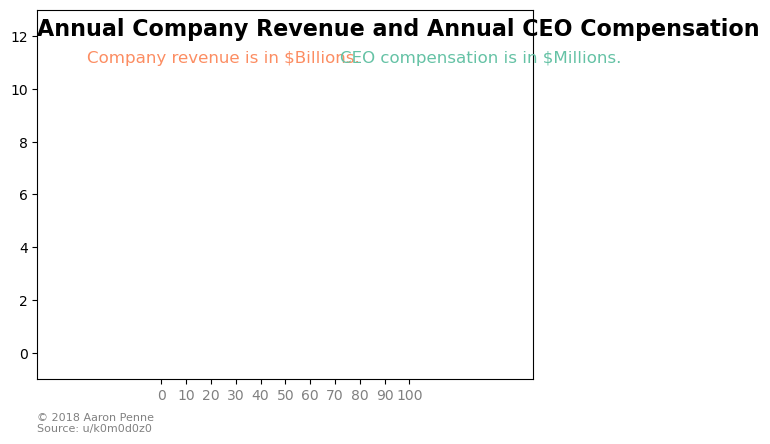

In [127]:
# Despine
'''matplotlib.spines.Spine(axes, spine_type, path, **kwargs)'''
for side in ['right', 'left', 'top', 'bottom']:
    ax.spines[side].set_visible(False) #boundary box disappear

plt.ylim([-1, 13])
plt.xlim([-50, 150])
plt.xticks(range(0,101,10), color='gray')
ax.set_yticklabels('')


plt.text(-50, 12, 'Annual Company Revenue and Annual CEO Compensation',
         horizontalalignment='left',
         size=16,
         weight='bold')
plt.text(-30, 11, 'Company revenue is in $Billions.',
         horizontalalignment='left',
         color='#FC8D62',
         size=12)
plt.text(72, 11, 'CEO compensation is in $Millions.',
         horizontalalignment='left',
         color='#65C2A5',
         size=12)
plt.text(-50, -3, '© 2018 Aaron Penne\nSource: u/k0m0d0z0',
         horizontalalignment='left',
         color='gray',
         size=8)

# Reveal
plt.show()

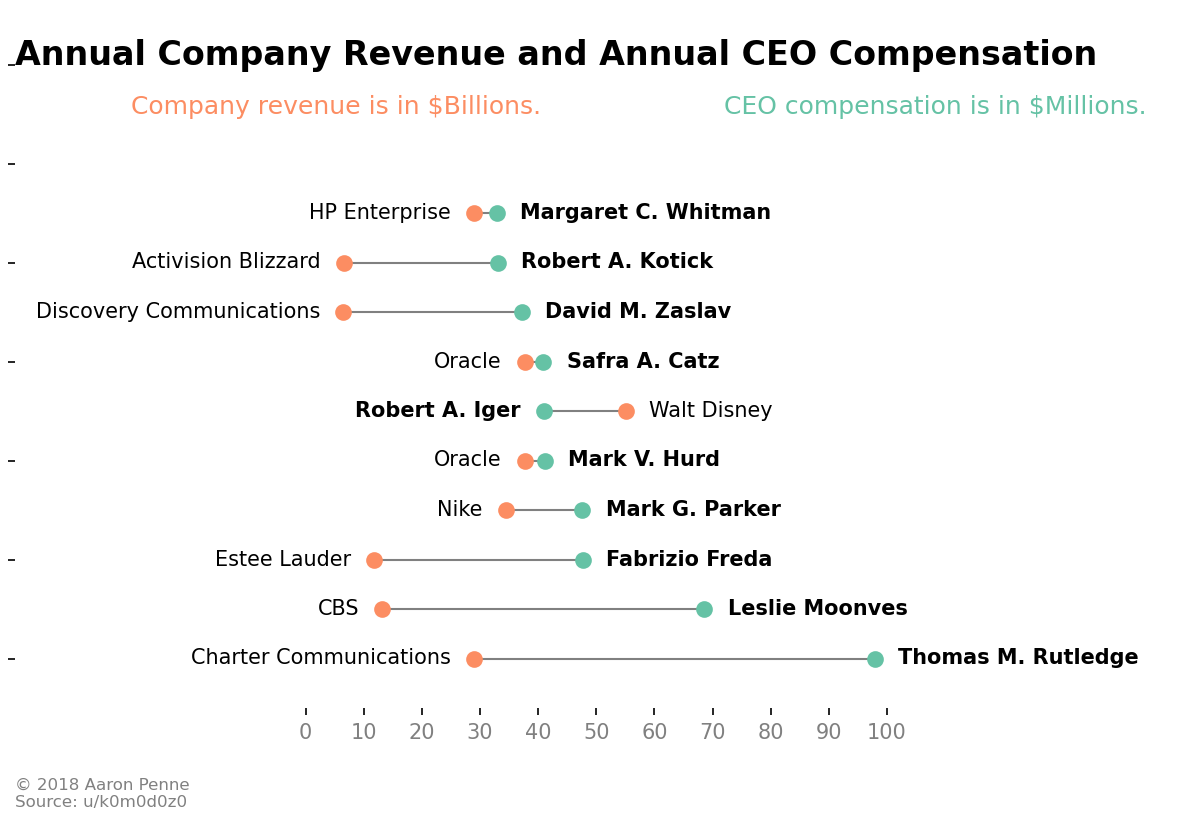

In [129]:
#plt.close('all')
# Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

for i in df.index:
    x = [df.loc[i,'annual_compensation'], df.loc[i, 'annual_revenue']]
    y = [i, i]
#     print(x, y)
    plt.plot(x, y,
             color='gray',
             linestyle='-',
             linewidth=1)
    if x[0] > x[1]:
        plt.text(x[0]+4, y[0], df.loc[i, 'ceo'], horizontalalignment='left', verticalalignment='center', weight='bold')
        plt.text(x[1]-4, y[1], df.loc[i, 'company'], horizontalalignment='right', verticalalignment='center')
    else:
        plt.text(x[0]-4, y[0], df.loc[i, 'ceo'], horizontalalignment='right', verticalalignment='center', weight='bold')
        plt.text(x[1]+4, y[1], df.loc[i, 'company'], horizontalalignment='left', verticalalignment='center')

# Plot compensation
x = df.loc[:,'annual_compensation']
y = df.index
plt.plot(x, y,
         color='#65C2A5',
         linestyle='None',
         marker='o',
         markersize=7,
         fillstyle='full')

# Plot company revenue
x = df.loc[:,'annual_revenue']
y = df.index
plt.plot(x, y,
         color='#FC8D62',
         linestyle='None',
         marker='o',
         markersize=7,
         fillstyle='full')

# Despine
'''matplotlib.spines.Spine(axes, spine_type, path, **kwargs)'''
for side in ['right', 'left', 'top', 'bottom']:
    ax.spines[side].set_visible(False) #boundary box disappear

plt.ylim([-1, 13])
plt.xlim([-50, 150])
plt.xticks(range(0,101,10), color='gray')
ax.set_yticklabels('')


plt.text(-50, 12, 'Annual Company Revenue and Annual CEO Compensation',
         horizontalalignment='left',
         size=16,
         weight='bold')
plt.text(-30, 11, 'Company revenue is in $Billions.',
         horizontalalignment='left',
         color='#FC8D62',
         size=12)
plt.text(72, 11, 'CEO compensation is in $Millions.',
         horizontalalignment='left',
         color='#65C2A5',
         size=12)
plt.text(-50, -3, '© 2018 Aaron Penne\nSource: u/k0m0d0z0',
         horizontalalignment='left',
         color='gray',
         size=8)

# Reveal
plt.show()

## Python  "Seaborn" package

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [130]:
from IPython.display import IFrame
IFrame(src='https://seaborn.pydata.org/', width=1000, height=600)

## Let us play with Seaborn - example 2

. Using data from FIFA 19 complete player dataset on kaggle-Detailed attributes for every player registered in
. FIFA database @ https://www.kaggle.com/karangadiya/fifa19

In [131]:
import seaborn as sns

sns.set(style="ticks") # We dont Probably need the Gridlines. 
player_df = pd.read_csv("FIFA23_official_data.csv")
player_df.shape

(17660, 29)

In [102]:
player_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

In [137]:
#https://pandas.pydata.org/docs/reference/api/pandas.set_option.html
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [135]:
player_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,€91M,€115K,2312,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,€78.5M,€190K,2305,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,€46.5M,€46K,2303,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,€107.5M,€350K,2303,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,€89.5M,€110K,2296,Right,3.0,3.0,3.0,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [140]:
type(player_df.dtypes)

pandas.core.series.Series

In [141]:
player_dtype = pd.DataFrame(player_df.dtypes).reset_index()

In [142]:
player_dtype.head()

,index,0
0,ID,int64
1,Name,object
2,Age,int64
3,Photo,object
4,Nationality,object


In [145]:
player_dtype.columns = ["Column_name", "Dtype"]

In [147]:
player_dtype.index

RangeIndex(start=0, stop=29, step=1)

In [148]:
numeric_cols = player_dtype.Column_name[player_dtype.Dtype != "object"]
numeric_cols

0                           ID
2                          Age
6                      Overall
7                    Potential
12                     Special
14    International Reputation
15                   Weak Foot
16                 Skill Moves
27                  Kit Number
Name: Column_name, dtype: object

In [174]:
player_dtype.Dtype

0       int64
1      object
2       int64
3      object
4      object
5      object
6       int64
7       int64
8      object
9      object
10     object
11     object
12      int64
13     object
14    float64
15    float64
16    float64
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27    float64
28     object
Name: Dtype, dtype: object

In [107]:
cat_cols = player_dtype.Column_name[player_dtype.Dtype == "object"]
cat_cols

1                     Name
3                    Photo
4              Nationality
5                     Flag
8                     Club
9                Club Logo
10                   Value
11                    Wage
13          Preferred Foot
17               Work Rate
18               Body Type
19               Real Face
20                Position
21                  Joined
22             Loaned From
23    Contract Valid Until
24                  Height
25                  Weight
26          Release Clause
28     Best Overall Rating
Name: Column_name, dtype: object

In [108]:
player_df[cat_cols].head()

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Best Overall Rating
0,L. Goretzka,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,€91M,€115K,Right,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,NaN
1,Bruno Fernandes,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,Manchester United,https://cdn.sofifa.net/teams/11/30.png,€78.5M,€190K,Right,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,NaN
2,M. Acuña,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,€46.5M,€46K,Left,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,NaN
3,K. De Bruyne,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,Manchester City,https://cdn.sofifa.net/teams/10/30.png,€107.5M,€350K,Right,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,NaN
4,N. Barella,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,Inter,https://cdn.sofifa.net/teams/44/30.png,€89.5M,€110K,Right,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,NaN


### Data Cleaning, from string to numeric

In [117]:
#convert wage and value from a string to a number

In [149]:
player_df['Value'].head()

0       €91M
1     €78.5M
2     €46.5M
3    €107.5M
4     €89.5M
Name: Value, dtype: object

In [120]:
player_df['Wage'].head()

0    €115K
1    €190K
2     €46K
3    €350K
4    €110K
Name: Wage, dtype: object

In [ ]:
# dDtype from pandas df is "O" means it is a string

In [150]:
player_df['Wage'][0] # => 115000

'€115K'

In [161]:
def wage_split(x):
    try:
        '''#split by separator "K", and pick up the left side piece'''
        return int(x.split("K")[0][1:])* 1000
    except:
        return 0        


def value_split(x):
    try:
        if 'M' in x:
            return float(x.split("M")[0][1:])* 1000000 #
        elif 'K' in x:
            return float(x.split("K")[0][1:]) * 1000
    except:
        return 0
    


In [154]:
x = '€115K'
'K' in x

True

In [ ]:
float(x.split("K")[0][1:]) * 1000

In [159]:
int(x.split("K")[0][1:]) *1000

115000

In [162]:
wage_split("€115K")

115000

In [163]:
value_split("€78.5M")

78500000.0

In [ ]:
# new concept: .apply() and lambda  

*  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [ ]:
player_df['Wage'].apply(function_, input_)

In [165]:
#player_df['Wage'] = player_df['Wage'].apply(wage_split)

* df["Wage"].apply(lambda x : <function taking x as input asuch as wage_split(x)>)

In [166]:
player_df['Wage'] = player_df['Wage'].apply(lambda x : wage_split(x))

In [167]:
player_df['Value'] = player_df['Value'].apply(lambda x : value_split(x))

In [187]:
player_df.dtypes['Wage']

dtype('int64')

### Correlation Plot

In [190]:
list(numeric_cols)

['ID',
 'Age',
 'Overall',
 'Potential',
 'Special',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Kit Number']

In [188]:
player_df_num = player_df[list(numeric_cols)[1:] + ["Value", "Wage"]]

In [191]:
list(numeric_cols)[1:] + ["Value", "Wage"]

['Age',
 'Overall',
 'Potential',
 'Special',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Kit Number',
 'Value',
 'Wage']

In [192]:
#df.corr(method='pearson', min_periods=1) <= Compute pairwise correlation of columns, excluding NA/null values
corr = player_df_num.corr()
corr #return a 6X6 dataframe 

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Kit Number,Value,Wage
Age,1.000000,0.595690,-0.029151,0.381506,0.419898,0.132360,0.195672,-0.290675,0.177374,-0.278843
Overall,0.595690,1.000000,0.706595,0.697941,0.483563,0.264347,0.440420,-0.275838,0.574010,-0.419034
Potential,-0.029151,0.706595,1.000000,0.487634,0.332091,0.218216,0.336911,-0.064897,0.517085,-0.268179
Special,0.381506,0.697941,0.487634,1.000000,0.318578,0.368170,0.734280,-0.200882,0.398700,-0.345811
International Reputation,0.419898,0.483563,0.332091,0.318578,1.000000,0.160210,0.225076,-0.110090,0.553349,-0.141582
Weak Foot,0.132360,0.264347,0.218216,0.368170,0.160210,1.000000,0.355293,-0.044868,0.176720,-0.147897
Skill Moves,0.195672,0.440420,0.336911,0.734280,0.225076,0.355293,1.000000,-0.101310,0.291224,-0.222346
Kit Number,-0.290675,-0.275838,-0.064897,-0.200882,-0.110090,-0.044868,-0.101310,1.000000,-0.116545,0.063529
Value,0.177374,0.574010,0.517085,0.398700,0.553349,0.176720,0.291224,-0.116545,1.000000,-0.145116
Wage,-0.278843,-0.419034,-0.268179,-0.345811,-0.141582,-0.147897,-0.222346,0.063529,-0.145116,1.000000


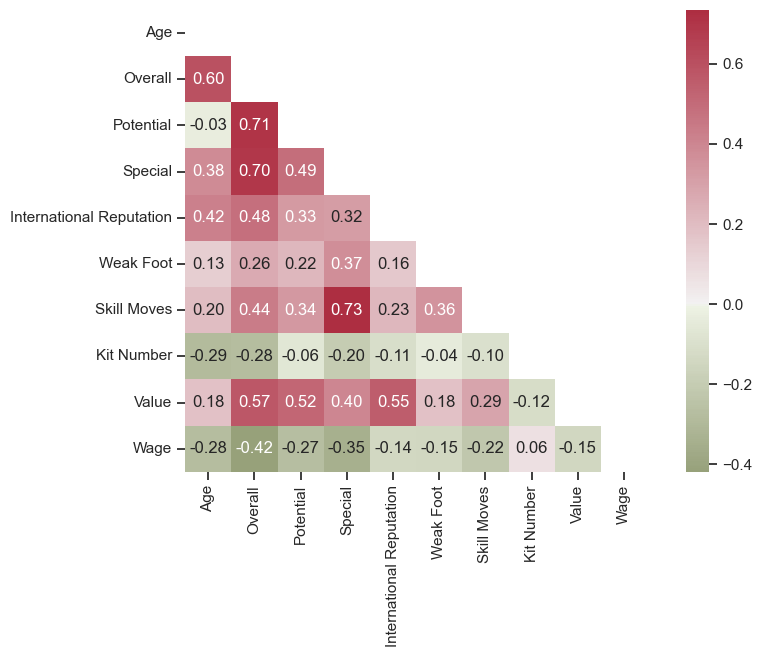

In [193]:
#seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, 
#                fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, 
#                cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

mask = np.triu(corr)

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
# sns.despine() # add the top and right line in graph

#g.figure.set_size_inches(14,10)
plt.show()

### Pivot Table Plot

In [144]:
player_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

In [ ]:
# please review .pivot_table() from pandas session anc compare to .pivot() 

In [198]:
#subset df by 2 boolean with & operator
filtered_player_df = player_df[(player_df['Club'].isin(['FC Barcelona', 'Paris Saint-Germain', 'Manchester United', 
                                                        'Manchester City', 'Chelsea', 'Real Madrid','FC Porto',
                                                        'FC Bayern München'])) & 
                               (player_df['Nationality'].isin(['England', 'Argentina',
                                                               'Brazil', 'Italy','Spain','Germany'])) 
                              ]

filtered_player_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,91000000.0,115000,2312,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
5,212622,J. Kimmich,27,https://cdn.sofifa.net/players/212/622/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,89,90,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,105500000.0,130000,2283,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),Yes,"<span class=""pos pos9"">RDM","Jul 1, 2015",NaN,2025,177cm,75kg,€182M,6.0,NaN
28,238074,R. James,22,https://cdn.sofifa.net/players/238/074/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,84,88,Chelsea,https://cdn.sofifa.net/teams/5/30.png,57000000.0,120000,2225,Right,2.0,3.0,3.0,High/ Medium,Stocky (170-185),Yes,"<span class=""pos pos2"">RWB","Mar 3, 2017",NaN,2025,178cm,87kg,€109.7M,24.0,NaN
29,189332,Jordi Alba,33,https://cdn.sofifa.net/players/189/332/23_60.png,Spain,https://cdn.sofifa.net/flags/es.png,85,85,FC Barcelona,https://cdn.sofifa.net/teams/241/30.png,28000000.0,190000,2218,Left,3.0,3.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos7"">LB","Jul 1, 2012",NaN,2024,170cm,68kg,€57.4M,18.0,NaN
45,188377,K. Walker,32,https://cdn.sofifa.net/players/188/377/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,85,85,Manchester City,https://cdn.sofifa.net/teams/10/30.png,37500000.0,170000,2196,Right,3.0,2.0,3.0,High/ High,Unique,Yes,"<span class=""pos pos3"">RB","Jul 14, 2017",NaN,2024,183cm,83kg,€69.4M,2.0,NaN


In [195]:
df_plot = filtered_player_df.groupby(['Club', 'Nationality']).size().reset_index() \
       .pivot(columns='Club',index='Nationality', values=0).reset_index()

df_plot

Club,Nationality,Chelsea,FC Barcelona,FC Bayern München,FC Porto,Manchester City,Manchester United,Paris Saint-Germain
0,Argentina,NaN,1.0,NaN,NaN,2.0,2.0,3.0
1,Brazil,2.0,4.0,1.0,6.0,3.0,1.0,3.0
2,England,20.0,NaN,NaN,1.0,13.0,31.0,NaN
3,Germany,NaN,1.0,13.0,NaN,2.0,NaN,2.0
4,Italy,2.0,NaN,NaN,NaN,NaN,NaN,4.0
5,Spain,4.0,22.0,1.0,2.0,2.0,4.0,5.0


In [196]:
df_plot.fillna(0, inplace = True)

In [197]:
df_plot.head()

Club,Nationality,Chelsea,FC Barcelona,FC Bayern München,FC Porto,Manchester City,Manchester United,Paris Saint-Germain
0,Argentina,0.0,1.0,0.0,0.0,2.0,2.0,3.0
1,Brazil,2.0,4.0,1.0,6.0,3.0,1.0,3.0
2,England,20.0,0.0,0.0,1.0,13.0,31.0,0.0
3,Germany,0.0,1.0,13.0,0.0,2.0,0.0,2.0
4,Italy,2.0,0.0,0.0,0.0,0.0,0.0,4.0


In [199]:
df_plot.set_index('Nationality').T

Nationality,Argentina,Brazil,England,Germany,Italy,Spain
Club,,,,,,
Chelsea,0.0,2.0,20.0,0.0,2.0,4.0
FC Barcelona,1.0,4.0,0.0,1.0,0.0,22.0
FC Bayern München,0.0,1.0,0.0,13.0,0.0,1.0
FC Porto,0.0,6.0,1.0,0.0,0.0,2.0
Manchester City,2.0,3.0,13.0,2.0,0.0,2.0
Manchester United,2.0,1.0,31.0,0.0,0.0,4.0
Paris Saint-Germain,3.0,3.0,0.0,2.0,4.0,5.0


In [201]:
df_in = df_plot.set_index('Nationality').T.sort_values(["Spain"], ascending = False)
df_in.head()

Nationality,Argentina,Brazil,England,Germany,Italy,Spain
Club,,,,,,
FC Barcelona,1.0,4.0,0.0,1.0,0.0,22.0
Paris Saint-Germain,3.0,3.0,0.0,2.0,4.0,5.0
Chelsea,0.0,2.0,20.0,0.0,2.0,4.0
Manchester United,2.0,1.0,31.0,0.0,0.0,4.0
FC Porto,0.0,6.0,1.0,0.0,0.0,2.0


* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [ ]:
# pandas_df.plot(kind = "bar")

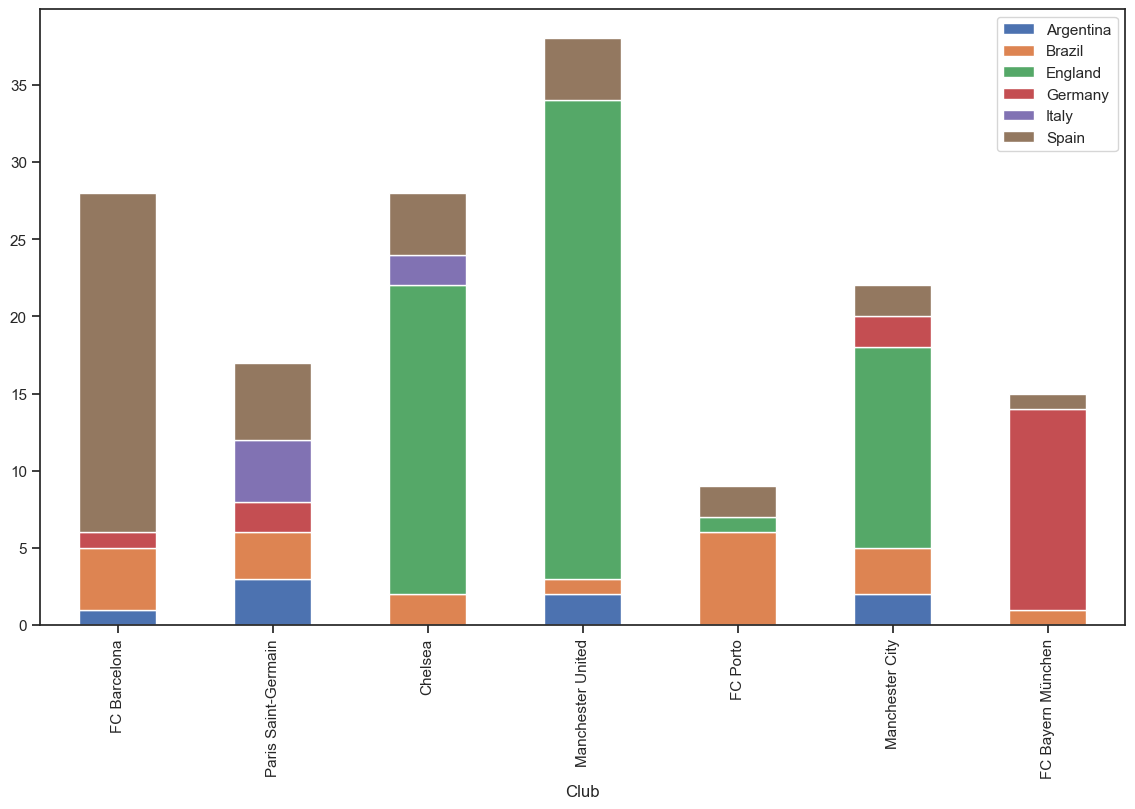

In [204]:
#stacking bar plot
ax = df_plot.set_index('Nationality').T.sort_values("Spain", ascending = False).plot(kind = 'bar', stacked=True, 
                                                                                    color=sns.color_palette())
ax.figure.set_size_inches(14,8)
plt.legend(loc = 0) 
plt.show()

### "Scatter" style plot for *Wage* information by clubs

In [207]:
filtered_player_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,91000000.0,115000,2312,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
5,212622,J. Kimmich,27,https://cdn.sofifa.net/players/212/622/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,89,90,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,105500000.0,130000,2283,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),Yes,"<span class=""pos pos9"">RDM","Jul 1, 2015",NaN,2025,177cm,75kg,€182M,6.0,NaN
28,238074,R. James,22,https://cdn.sofifa.net/players/238/074/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,84,88,Chelsea,https://cdn.sofifa.net/teams/5/30.png,57000000.0,120000,2225,Right,2.0,3.0,3.0,High/ Medium,Stocky (170-185),Yes,"<span class=""pos pos2"">RWB","Mar 3, 2017",NaN,2025,178cm,87kg,€109.7M,24.0,NaN
29,189332,Jordi Alba,33,https://cdn.sofifa.net/players/189/332/23_60.png,Spain,https://cdn.sofifa.net/flags/es.png,85,85,FC Barcelona,https://cdn.sofifa.net/teams/241/30.png,28000000.0,190000,2218,Left,3.0,3.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos7"">LB","Jul 1, 2012",NaN,2024,170cm,68kg,€57.4M,18.0,NaN
45,188377,K. Walker,32,https://cdn.sofifa.net/players/188/377/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,85,85,Manchester City,https://cdn.sofifa.net/teams/10/30.png,37500000.0,170000,2196,Right,3.0,2.0,3.0,High/ High,Unique,Yes,"<span class=""pos pos3"">RB","Jul 14, 2017",NaN,2024,183cm,83kg,€69.4M,2.0,NaN


In [209]:
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

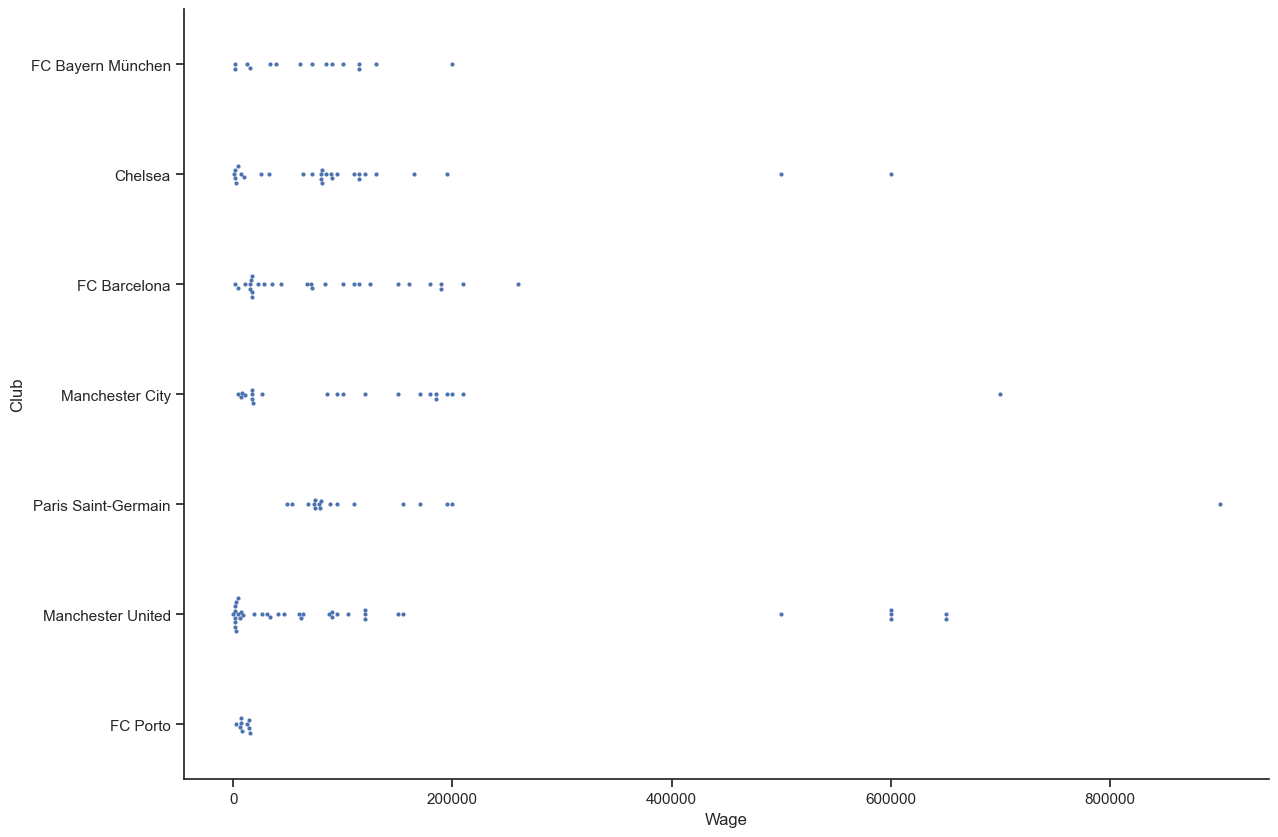

In [210]:
#seaborn.swarmplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, 
#                 color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)

g = sns.swarmplot(y = "Club",  x = 'Wage', data = filtered_player_df, 
                  # Decrease the size of the points to avoid crowding
                  size = 3)

sns.despine() # remove the top and right line in grapha
g.figure.set_size_inches(14,10)
plt.show()

## More correlation among *Value, Potential and Wages*

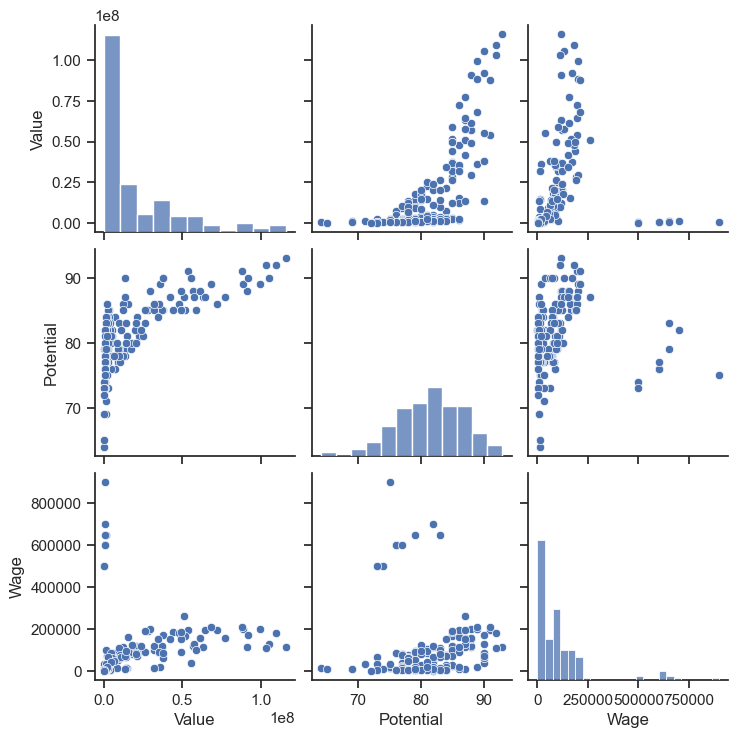

In [211]:
filtered_player_df = player_df[(player_df['Club'].isin(['FC Barcelona', 'Paris Saint-Germain',
                                                        'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid','FC Porto','FC Bayern München'])) &
                               (player_df['Nationality'].isin(['England', 'Brazil', 'Argentina', 'Brazil', 'Italy','Spain','Germany']))]

# Single line to create pairplot <= useful to check varible distribution 
g = sns.pairplot(filtered_player_df[['Value','Potential','Wage']])

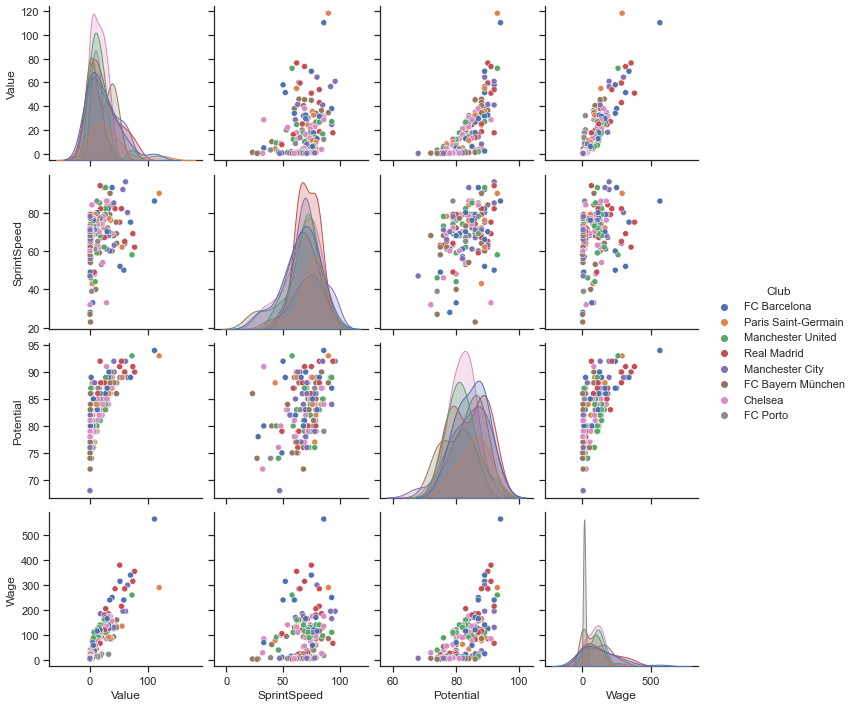

In [144]:
g = sns.pairplot(filtered_player_df[['Value','SprintSpeed','Potential','Wage','Club']],hue = 'Club')

# Appendix -- Deep Dive

## Example 3

In [ ]:
g = sns.boxplot(y = "Club",
x = 'Wage',
data = filtered_player_df, whis=np.inf)
g = sns.swarmplot(y = "Club",
x = 'Wage',
data = filtered_player_df,
# Decrease the size of the points to avoid crowding
size = 7,color = 'black')
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

## Example 4

In [ ]:
# https://matplotlib.org/gallery/lines_bars_and_markers/spectrum_demo.html#sphx-glr-gallery-lines-bars-and-markers-spectrum-demo-py

import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0) #to be reproducible 

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axes[0, 0].set_title("Signal")
axes[0, 0].plot(t, s, color='C0')
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axes[1, 0].set_title("Magnitude Spectrum")
axes[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axes[1, 1].set_title("Log. Magnitude Spectrum")
axes[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axes[2, 0].set_title("Phase Spectrum ")
axes[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axes[2, 1].set_title("Angle Spectrum")
axes[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axes[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()

## Example 5

In [ ]:
# import urllib.request
# import json

# url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
# url += '?per_page=100'
# url
# data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())
# data
dates = []
names = []
for item in data:
    if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
        dates.append(item['published_at'].split("T")[0])
        names.append(item['tag_name'])
# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

In [ ]:
# https://matplotlib.org/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py

import matplotlib.dates as mdates
from datetime import datetime #datetime.datetime
#import datetime 

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import urllib.request
    import json

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

In [ ]:
np.array(['top', 'bottom'])[(levels > 0).astype(int)]

In [ ]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1], int(np.ceil(len(dates)/6)))[:len(dates)] #get repeat array A for B times 

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True) #define plot size
ax.set(title="Matplotlib release dates")

#A stem plot draws lines perpendicular to a baseline at each location locs
markerline, stemline, baseline = ax.stem(dates, levels, linefmt="C3-", basefmt="k-")#, use_line_collection=True)

#Set properties, 
plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

#creat repeated ['top', 'bottom'] array, "top" if levels >0 otherwise "bottom" 
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]

# annotate lines by zip lists
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4)) #set interval of 4 months in X-axis
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

## Images
Reading, generating and plotting images in matplotlib is quite straightforward.

To read an image, just import the `matplotlib.image` module, and call its `imread` function, passing it the file name (or file object). This returns the image data, as a NumPy array. Let's try this with the `my_square_function.png` image we saved earlier.

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread('./my_square_function.png')
print(img.shape, img.dtype) #height, width, and color channels

### We have loaded a 432X720 image with 4 channels of color. Each pixel is represented by a 4-element array: red, green, blue, and alpha levels, stored as 32-bit floats between 0 and 1.  Now all we need to do is to call `imshow`:

In [ ]:
img[0]

In [ ]:
plt.imshow(img)
plt.show()

Tadaaa! You may want to hide the ouside box axes when you are displaying an image:

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

It's just as easy to generate your own image:

In [ ]:
#generate a list of integer from 0 to 9999 and reshape it 100 x 100 
img = np.arange(100*100).reshape(100, 100)
print(img)
plt.imshow(img, cmap="hot") #Display data as an image on a 2D regular raster
plt.show()

As we did not provide RGB levels, the `imshow` function automatically maps values to a color gradient. By default, the color gradient goes from blue (for low values) to red (for high values), but you can select another color map.  For example:

In [ ]:
# 'viridis', 'hot','flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 
# 'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral','gist_ncar', 'brg'

plt.imshow(img, cmap="rainbow") #cmap for Colormap, default: rcParams["image.cmap"] (default: 'viridis')
plt.show()

You can also generate an RGB (Red, Green, Blue) image directly:

In [ ]:
img = np.empty((9,18,3))
img[:, :6] = [0, 0, 0.6]
img[:, 6:12] = [1, 1, 1]
img[:, 12:] = [0.6, 0, 0]
print(img[0][:10])

In [ ]:
plt.imshow(img)
plt.show() #flag of France

Since the `img` array is just quite small (20x30), when the `imshow` function displays it, it grows the image to the figure's size. By default it uses [bilinear interpolation](https://en.wikipedia.org/wiki/Bilinear_interpolation) to fill the added pixels. This is why the edges look blurry.
You can select another interpolation algorithm, such as copying the color of the nearest pixel:

In [ ]:
#the interpolation option supports values 'none', 'antialiased', 'nearest', 'bilinear', 'bicubic', 'spline16', 
#'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 
#'sinc', 'lanczos', 'blackman'

plt.imshow(img, interpolation="nearest") 
plt.show()

## Multiple figures
It is also possible to draw multiple figures. Each figure may contain one or more subplots. By default, matplotlib creates `figure(1)` automatically. When you switch figure, pyplot keeps track of the currently active figure (which you can get a reference to by calling `plt.gcf()`), and the active subplot of that figure becomes the current subplot.

In [ ]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(x, x**2)
plt.title("Square and Cube")
plt.subplot(212)
plt.plot(x, x**3)

plt.figure(2, figsize=(6, 3))
plt.subplot(121)
plt.plot(x, x**4)
plt.title("y = x**4")
plt.subplot(122)
plt.plot(x, x**5)
plt.title("y = x**5")

plt.figure(1)      # reset figure to 1 from subplot 212 (bottom)
plt.plot(x, -x**3, "r:")

plt.show()

In [ ]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2
plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

plt.show()

Just for fun, if you want an [xkcd](http://xkcd.com)-style plot, just draw within a `with plt.xkcd()` section:

In [ ]:
with plt.xkcd(): #sketch-style drawing mode
    plt.plot(x, x**2, px, py, "ro")

    bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
    plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

    bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
    plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

    plt.show()

## Saving a figure
Saving a figure to disk is as simple as calling [`savefig`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig) with the name of the file (or a file object). The available image formats depend on the graphics backend you use.

In [ ]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_square_function.png", transparent=True)
plt.show()

## Polar projection
Drawing a polar graph is as easy as setting the `projection` attribute to `"polar"` when creating the subplot.

In [ ]:
radius = 1
theta = np.linspace(0, 2*np.pi*radius, 1000)

plt.subplot(111) #put all plots in 1X1X1 grid
plt.plot(theta, np.sin(5*theta), "g-")
plt.plot(theta, 0.5*np.cos(20*theta), "b-")
plt.show()

plt.subplot(111, projection = "polar") #with projection based on polar axis
plt.plot(theta, np.sin(5*theta), "g-")
plt.plot(theta, 0.5*np.cos(20*theta), "b-")
plt.show()

## 3D projection

Plotting 3D graphs is quite straightforward. You need to import `Axes3D`, which registers the `"3d"` projection. Then create a subplot setting the `projection` to `"3d"`. This returns an `Axes3DSubplot` object, which you can use to call `plot_surface`, giving x, y, and z coordinates, plus optional attributes.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)
plt.show()


Another way to display this same data is *via* a contour plot.

In [ ]:
plt.contourf(X, Y, Z, cmap=matplotlib.cm.coolwarm)
plt.colorbar()
plt.show()

## Ticks and tickers
The axes have little marks called "ticks".  To be precise, "ticks" are the *locations* of the marks (eg. (-1, 0, 1)), "tick lines" are the small lines drawn at those locations, "tick labels" are the labels drawn next to the tick lines, and "tickers" are objects that are capable of deciding where to place ticks. The default tickers typically do a pretty good job at placing ~5 to 8 ticks at a reasonable distance from one another.

But sometimes you need more control (eg. there are too many tick labels on the logit graph above). Fortunately, matplotlib gives you full control over ticks.  You can even activate minor ticks.



In [ ]:
x = np.linspace(-2, 2, 100)

plt.figure(1, figsize=(15,10))
plt.subplot(131) #set 1X3 grid
plt.plot(x, x**3) #plot 1
plt.grid(True)
plt.title("Default ticks")

ax = plt.subplot(132)
plt.plot(x, x**3) #plot 2
ax.xaxis.set_ticks(np.arange(-2, 2, 1)) #set X-axis tickers range
plt.grid(True)
plt.title("Manual ticks on the x-axis")

ax = plt.subplot(133)
plt.plot(x, x**3) #plot 3
plt.minorticks_on() #display minor ticks on the axes
ax.tick_params(axis='x', which='minor', bottom=False) #Change the appearance of ticks, tick labels, and gridlines
ax.xaxis.set_ticks([-2, 0, 1, 2])
ax.yaxis.set_ticks(np.arange(-5, 5, 1))
ax.yaxis.set_ticklabels(["min", -4, -3, -2, -1, 0, 1, 2, 3, "max"])
plt.title("Manual ticks and tick labels\n(plus minor ticks) on the y-axis")


plt.grid(True)

plt.show()

## Animations
Although matplotlib is mostly used to generate images, it is also capable of displaying animations, depending on the Backend you use. In a Jupyter notebook, we need to use the `nbagg` backend to use interactive matplotlib features, including animations. We also need to import `matplotlib.animation`.

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


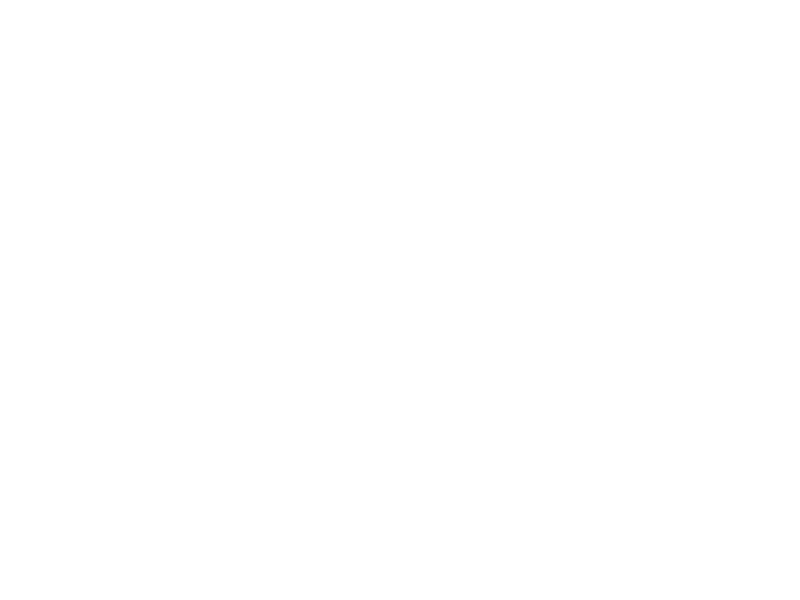

In [2]:
#Makes an animation by repeatedly calling a function func
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In this example, we start by creating data points, then we create an empty plot, we define the update function that will be called at every iteration of the animation, and finally we add an animation to the plot by creating a `FuncAnimation` instance.

The `FuncAnimation` constructor takes a figure, an update function and optional arguments. We specify that we want a 100-frame long animation, with 20ms between each frame. At each iteration, `FuncAnimation` calls our update function and passes it the frame number `num` (from 0 to 99 in our case) followed by the extra arguments that we specified with `fargs`.

Our update function simply sets the line data to be the first `num` data points (so the data gets drawn gradually), and just for fun we also add a small random number to each data point so that the line appears to wiggle.

# What next?
Now you know all the basics of matplotlib, but there are many more options available. The best way to learn more, is to visit the [gallery](http://matplotlib.org/gallery.html), look at the images, choose a plot that you are interested in, then just copy the code in a Jupyter notebook and play around with it.



Reference: https://matplotlib.org/3.1.0/api/pyplot_summary.html


Extra Reading:
https://www.dataquest.io/blog/matplotlib-tutorial/

Advanced Plotting using:


  Any text in matplotlib may contain TeX equation expressions, see [the documentation](http://matplotlib.org/users/mathtext.html) for more details.